# Housing Price Prediction:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?


# Business Goal:

# Importing datasets:

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [16]:
#To print all columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [58]:
#importing train dataset
df = pd.read_csv("train.csv") #Reading csv file
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

Above is my train dataset on which i have to build a predictive model. And I have to use the saved best model to predict sales price in test dataset. So clearly SalesPrice is my target and since data type of SalesPrice column is integer it is a **Regression Problem.**

In [59]:
#importing test dataset
dff = pd.read_csv("test.csv") #Reading csv file
dff.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

Above is my test dataset. But i'm not doing that because of data leakage problem. Let me separately clean both train and test datasets.
Firstly let me clean train dataset followed by test dataset.

# Exploratory Data Analysis:

In [5]:
#Checking shape of my train dataset
df.shape

(1168, 81)

In my tarin dataset i have 1168 rows and 81 columns.

In [6]:
#Checking shape of my test dataset
dff.shape

(292, 80)

In my test dataset i have 292 rows and 80 columns.

In [7]:
#Checking all column names of train dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Above are the column names of the train dataset.

In [8]:
#Checking all column names of train dataset
dff.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Above are the column names of the test dataset.

In [9]:
#Checking the data types of all columns in train dataset
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In the train dataset we have int, object as well as flaot data types.

In [10]:
#Checking the data types of all columns in test dataset
dff.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In my test dataset i have int, object as well as flaot data types.

In [11]:
#Checking the info about the train dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

- Above is the info about train dataset and i can see some missing values in the dataset. I have to take care of those missing values.
- And in Alley, PoolQC, Fence and  MiscFeature has more than 80% null values so i decided to drop this columns.

In [60]:
#Dropping unnecessary columns in train dataset
df = df.drop(["Alley"],axis=1)
df = df.drop(["PoolQC"],axis=1)
df = df.drop(["Fence"],axis=1)
df = df.drop(["MiscFeature"],axis=1)

In [13]:
#Checking the info about the test dataset
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

- Above is the info about test dataset and i can see some missing values in the dataset. I have to take care of those missing values.
- And in Alley, PoolQC, Fence and MiscFeature has more than 80% null values so i decided to drop this columns.

In [61]:
#Dropping unnecessary columns in test dataset
dff = dff.drop(["Alley"],axis=1)
dff = dff.drop(["PoolQC"],axis=1)
dff = dff.drop(["Fence"],axis=1)
dff = dff.drop(["MiscFeature"],axis=1)

In [15]:
#Checking unique values of each column in train dataset
df.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFinSF       21
GrLivArea 

- In Id column the unique count is 1168 which means all the values in the column are unique and ID is the identity number given for perticular asset so this ID has nothing to do with model training so i can drop this column.
- In Utilities column unique value count is 1 which means all the entries are same this will not help us in model building so let me drop this column.

In [62]:
#Droping unnecessary columns in train dataset
df = df.drop(["Id"],axis=1)
df = df.drop(["Utilities"],axis=1)

In [17]:
#Checking unique values of each column in test dataset
dff.nunique()

Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
Street             2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      24
Condition1         8
Condition2         2
BldgType           5
HouseStyle         8
OverallQual        8
OverallCond        7
YearBuilt         84
YearRemodAdd      57
RoofStyle          5
RoofMatl           3
Exterior1st       12
Exterior2nd       14
MasVnrType         4
MasVnrArea       104
ExterQual          4
ExterCond          4
Foundation         6
BsmtQual           4
BsmtCond           3
BsmtExposure       4
BsmtFinType1       6
BsmtFinSF1       184
BsmtFinType2       6
BsmtFinSF2        32
BsmtUnfSF        231
TotalBsmtSF      224
Heating            4
HeatingQC          4
CentralAir         2
Electrical         4
1stFlrSF         238
2ndFlrSF         113
LowQualFinSF       4
GrLivArea        246
BsmtFullBath       3
BsmtHalfBath 

- In Id column the unique count is 292 which means all the values in the column are unique and ID is the identitity number given for perticular asset so this ID has nothing to do with model training so i can drop this column.
- Since i have droped Utilities in train i have to drop here also.

In [63]:
#Droping unnecessary columns in test dataset
dff = dff.drop(["Id"],axis=1)
dff = dff.drop(["Utilities"],axis=1)

In [7]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column in train dataset.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
****************************************
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
****************************************
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
102.0      1
144.0      1
112.0      1
149.0      1
153.0      1
Name: LotFrontage, Length: 106, dtype: int64
****************************************
9600     21
7200     18
6000     16
8400     14
9000     11
         ..
12803     1
9480      1
13478     1
12122     1
7861      1
Name: LotArea, Length: 892, dtype: int64
****************************************
Pave    1164
Grvl       4
Name: Street, dtype: int64
****************************************
Grvl    41
Pave    36
Name: Alley, dtype: int64
*********************************

I did not found any unnecessary or duplicate entries in any column in train dataset.

But i can see more than 85% zero values in 
- BsmtFinSF2
- LowQualFinSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal

 So i have to drop these columns. In some other columns also there are zero values below 60% they are acceptable and also reasonable.

In [64]:
#Dropping unnecessary columns in train dataset
df.drop(columns = ['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace = True)

In [21]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column in test dataset.
for i in dff.columns:
        print(dff[i].value_counts())
        print('****************************************')

20     108
60      55
50      31
120     18
30      17
160     16
80      15
90      11
70       7
180      4
190      4
45       2
75       2
85       1
40       1
Name: MSSubClass, dtype: int64
****************************************
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64
****************************************
60.0     32
85.0     14
50.0     13
70.0     12
21.0      9
65.0      9
80.0      9
75.0      7
52.0      6
63.0      6
78.0      6
66.0      5
64.0      5
57.0      5
43.0      4
72.0      4
55.0      4
100.0     4
40.0      4
74.0      4
102.0     3
48.0      3
93.0      3
79.0      3
86.0      3
110.0     3
67.0      3
90.0      3
68.0      3
44.0      3
76.0      3
24.0      3
56.0      2
83.0      2
58.0      2
92.0      2
32.0      2
35.0      2
73.0      2
47.0      2
96.0      2
107.0     2
42.0      2
51.0      2
37.0      2
62.0      2
91.0      2
98.0      2
105.0     1
150.0     1
61.0      1
45.0      1
137.0    

Name: MasVnrArea, dtype: int64
****************************************
TA    189
Gd     91
Ex      9
Fa      3
Name: ExterQual, dtype: int64
****************************************
TA    260
Gd     29
Fa      2
Ex      1
Name: ExterCond, dtype: int64
****************************************
PConc     134
CBlock    118
BrkTil     34
Slab        3
Wood        2
Stone       1
Name: Foundation, dtype: int64
****************************************
TA    132
Gd    120
Ex     27
Fa      6
Name: BsmtQual, dtype: int64
****************************************
TA    270
Gd      9
Fa      6
Name: BsmtCond, dtype: int64
****************************************
No    197
Av     41
Gd     26
Mn     21
Name: BsmtExposure, dtype: int64
****************************************
GLQ    88
Unf    85
ALQ    46
BLQ    27
Rec    24
LwQ    15
Name: BsmtFinType1, dtype: int64
****************************************
0       92
298      2
565      2
936      2
384      2
24       2
341      2
495      2
659 

I did not found any unnecessary or duplicate entries in any column in test dataset.

But i can see more than 85% zero values in 
- BsmtFinSF2
- LowQualFinSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal

 So i have to drop these columns. In some other columns also there are zero values below 60% they are acceptable and also reasonable.

In [65]:
#Dropping unnecessary columns in test dataset
dff.drop(columns = ['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace = True)

Successfully replaced all unnecessary entries.

In [23]:
#Checking null values in the train dataset
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr 

There are null values in most of the columns in train dataset i have impute them with there respective values.

In [24]:
#Checking null values in the test dataset
dff.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr 

There are null values in most of the columns in test dataset i have impute them with there respective values.

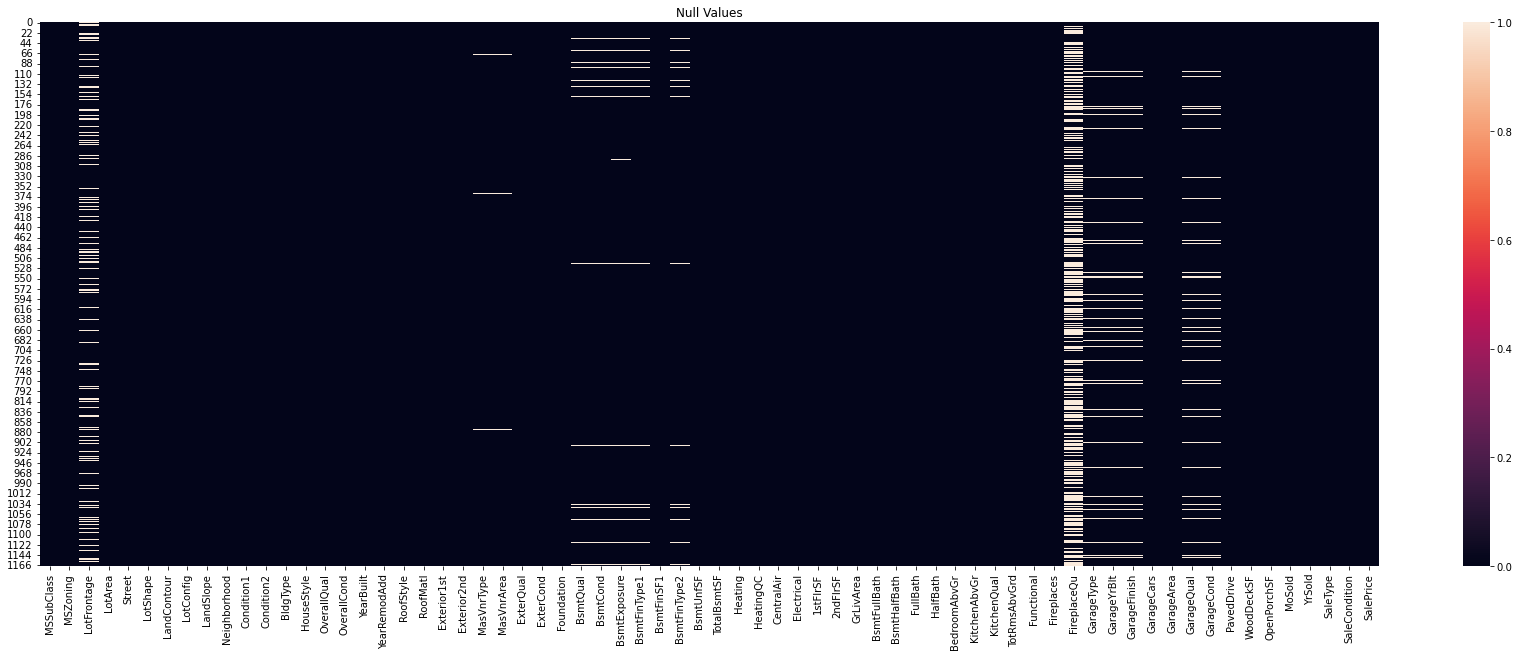

In [25]:
#Visualizeing null values in train dataset
plt.figure(figsize=[30,10])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

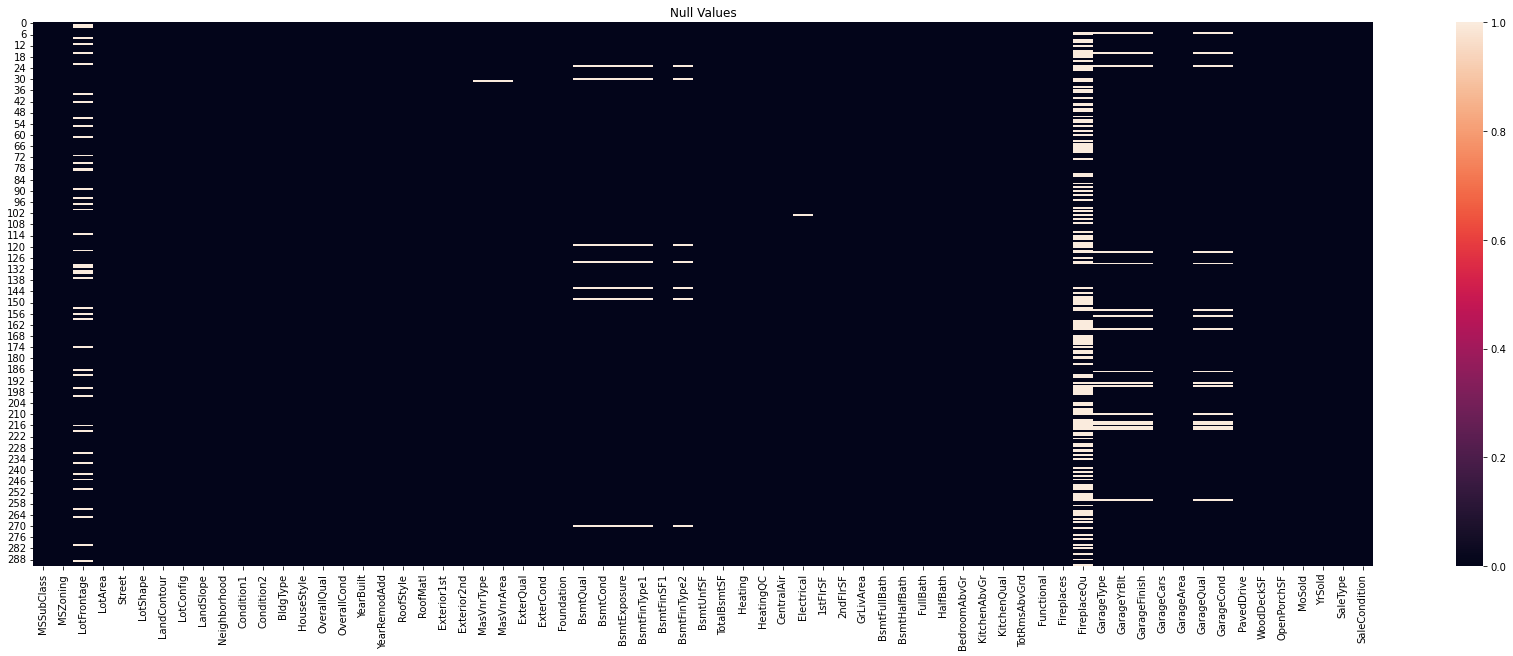

In [26]:
#Visualizeing null values in test dataset
plt.figure(figsize=[30,10])
sns.heatmap(dff.isnull())
plt.title("Null Values")
plt.show()

I can see the null values now clearly both in train and test datasets.

# Imputation technique to replace nan values:

In [66]:
#Creating a list of categorical and numerical datatypes in train dataset
df_categorical=[]
df_numerical=[]
for col in df.columns:
    if (df[col].dtype=='object'):
          df_categorical.append(col)
    else:
        df_numerical.append(col)

In [67]:
#Creating a list of categorical and numerical datatypes in test dataset
dff_categorical=[]
dff_numerical=[]
for col in dff.columns:
    if (dff[col].dtype=='object'):
          dff_categorical.append(col)
    else:
        dff_numerical.append(col)

In [68]:
#Replacing null values of categorical column with mode of that column in train dataset.
catcol=df.columns.values
for i in range(0,len(catcol)):
    if df[catcol[i]].dtype == "object":
        df[catcol[i]].fillna(df[catcol[i]].mode()[0], inplace=True)

In [69]:
#Replacing null values of categorical column with mode of that column in test dataset.
catcol1=dff.columns.values
for i in range(0,len(catcol1)):
    if dff[catcol1[i]].dtype == "object":
        dff[catcol1[i]].fillna(dff[catcol1[i]].mode()[0], inplace=True)

Replaced all null values in categorical columns in both train and test datasets.

In [70]:
#Replacing null values of numerical column with mean of that column in train dataset.
numcol=df.columns.values
for i in range(0,len(numcol)):
    if df[numcol[i]].dtype != "object":
        df[numcol[i]].fillna(df[numcol[i]].mean(), inplace=True)

In [71]:
#Replacing null values of numerical column with mean of that column in test dataset.
numcol1=dff.columns.values
for i in range(0,len(numcol1)):
    if dff[numcol1[i]].dtype != "object":
        dff[numcol1[i]].fillna(dff[numcol1[i]].mean(), inplace=True)

Replaced all null values in Numerical columns in both train and test datasets.

In [72]:
#Checking null values again in train dataset
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu 

In [34]:
#Checking null values again in test dataset
dff.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu 

Successfully i have replaced all null values in both train and test datasets.

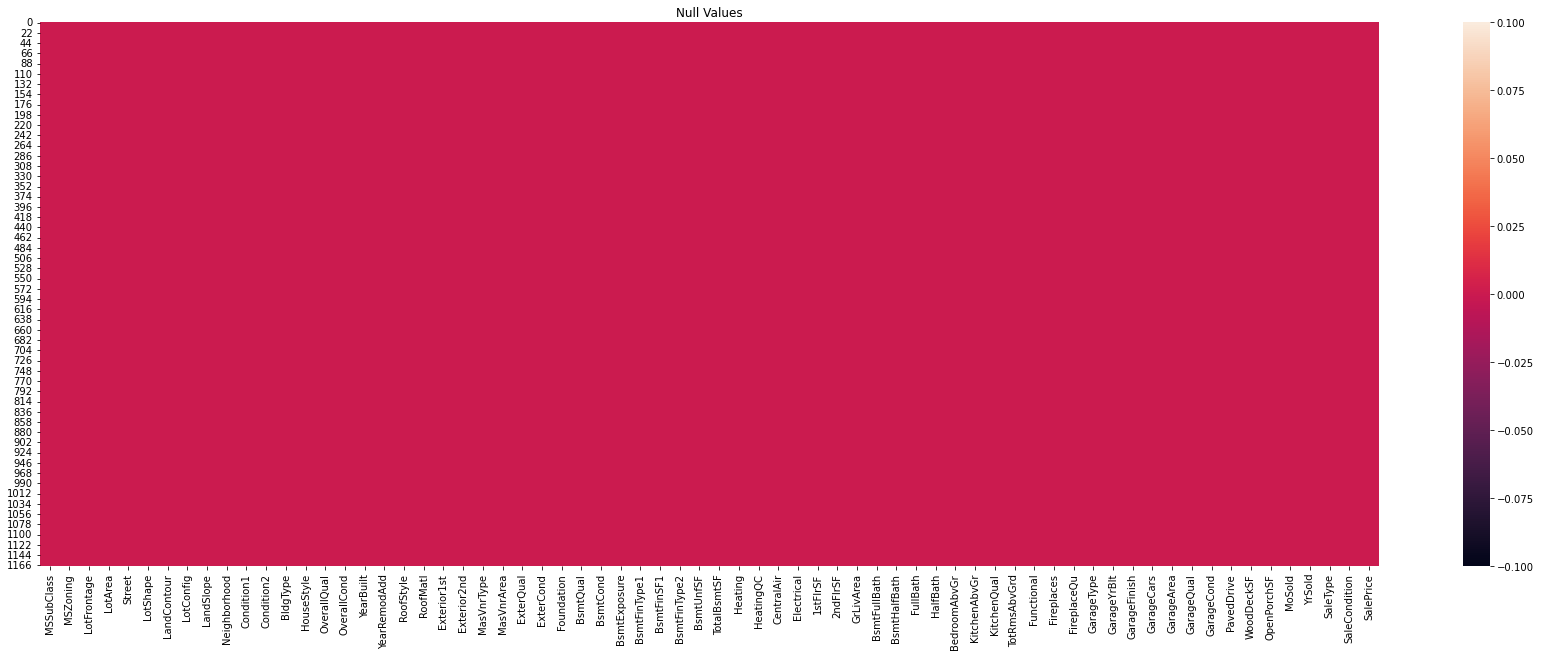

In [35]:
#Visualizeing null values again after imputation in train dataset
plt.figure(figsize=[30,10])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

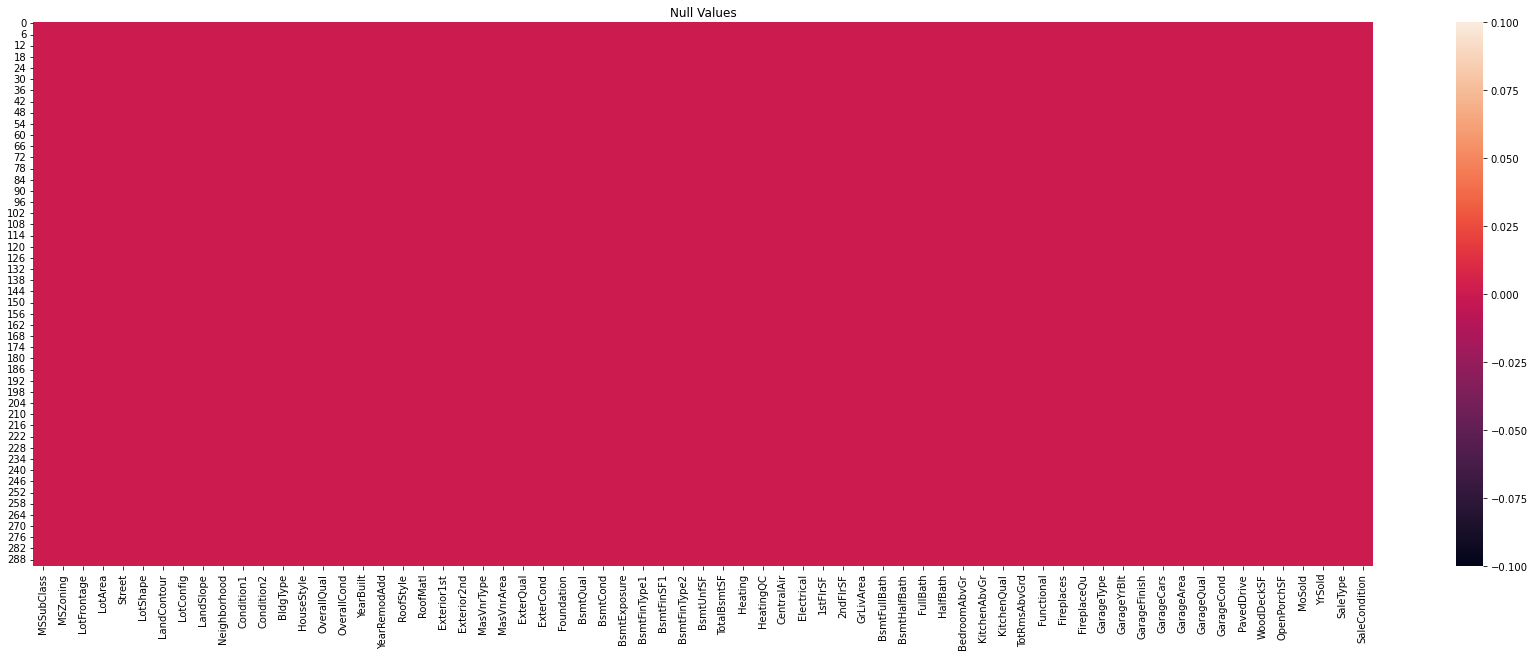

In [36]:
#Visualizeing null values again after imputation in test dataset
plt.figure(figsize=[30,10])
sns.heatmap(dff.isnull())
plt.title("Null Values")
plt.show()

Now successfully i have replaced all null values in both train and test datasets.

In [18]:
#Checking for empty observations in target column
df.loc[df['SalePrice'] == " "]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, PoolQC, Fence, MiscFeature, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

There is no empty observations in my target column.

# Feature Extraction:

In [73]:
# Converting years column to age column in train dataset
df['Year_SinceBuilt'] = df['YearBuilt'].max() - df['YearBuilt']
df['Year_SinceRemodAdded'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['Year_SinceSold'] = df['YrSold'].max() - df['YrSold']
df['GarageAge'] = df['GarageYrBlt'].max() - df['GarageYrBlt']

In [74]:
# Dropping old columns in train dataset
df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

In [75]:
# Converting years column to age column in test dataset
dff['Year_SinceBuilt'] = dff['YearBuilt'].max() - dff['YearBuilt']
dff['Year_SinceRemodAdded'] = dff['YearRemodAdd'].max() - dff['YearRemodAdd']
dff['Year_SinceSold'] = dff['YrSold'].max() - dff['YrSold']
dff['GarageAge'] = dff['GarageYrBlt'].max() - dff['GarageYrBlt']

In [76]:
# Dropping old columns in test dataset
dff.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

I have converted all the year columns to there respective age, thinking that age will help us more than year in both train and test datasets.

In [77]:
#Checking description of data set in train dataset
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean    102.310078   444.726027   569.721747  1061.095034  1169.860445   
std     182.047152   462.664785   449.375525   442.272249   391.161983   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   216.000000   799.000000   892.000000   
50%       0.000000   385.500000   474.000000  1005.500000  1096.500000   
75%     160.000000   714.500000   816.000000  1291.500000  1392.000000   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count  1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean    348.826199  1525.066781      0.425514      0.055651     1.562500   
std     439.696370   528.042957      0.521615      0.236699     0.551882   
min       0.000000   334.000000      0.000000      0.000000     0.000000   
25%       0.000000  1143.250000      0.000000      0.000000     1.000000   
50%       0.000000  1468.500000      0.000000      0.000000     2.000000   
75%     729.000000  1795.000000      1.000000      0.000000     2.000000   
max    2065.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF       MoSold  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      1.776541   476.860445    96.206336    46.559932     6.344178   
std       0.745554   214.466769   126.158988    66.381023     2.686352   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       1.000000   338.000000     0.000000     0.000000     5.000000   
50%       2.000000   480.000000     0.000000    24.000000     6.000000   
75%       2.000000   576.000000   171.000000    70.000000     8.000000   
max       4.000000  1418.000000   857.000000   547.000000    12.000000   

           SalePrice  Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold  \
count    1168.000000      1168.000000           1168.000000     1168.000000   
mean   181477.005993        39.069349             25.241438        2.195205   
std     79105.586863        30.145255             20.785185        1.329738   
min     34900.000000         0.000000              0.000000        0.000000   
25%    130375.000000        10.000000              6.000000        1.000000   
50%    163995.000000        38.000000             17.000000        2.000000   
75%    215000.000000        56.000000             44.0000

In [78]:
#Checking description of data set in test dataset
dff.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  292.000000   292.000000     292.000000   292.000000   292.000000   
mean    57.414384    66.425101   10645.143836     6.078767     5.493151   
std     43.780649    19.975962   13330.669795     1.356147     1.063267   
min     20.000000    21.000000    1526.000000     3.000000     3.000000   
25%     20.000000    57.750000    7200.000000     5.000000     5.000000   
50%     50.000000    66.425101    9200.000000     6.000000     5.000000   
75%     70.000000    76.000000   11658.750000     7.000000     6.000000   
max    190.000000   150.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count   292.000000   292.000000   292.000000   292.000000   292.000000   
mean    109.171821   439.294521   557.315068  1042.767123  1133.691781   
std     174.729023   429.559675   411.043768   424.561153   366.941919   
min       0.000000     0.000000     0.000000     0.000000   372.000000   
25%       0.000000     0.000000   255.000000   771.750000   858.000000   
50%       0.000000   369.500000   487.000000   971.000000  1047.500000   
75%     180.000000   700.500000   780.000000  1322.000000  1370.500000   
max    1031.000000  1767.000000  1935.000000  3094.000000  2402.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count   292.000000   292.000000    292.000000    292.000000  292.000000   
mean    339.657534  1477.051370      0.424658      0.065068    1.575342   
std     424.278825   514.199429      0.508831      0.247070    0.547856   
min       0.000000   520.000000      0.000000      0.000000    0.000000   
25%       0.000000  1061.500000      0.000000      0.000000    1.000000   
50%       0.000000  1440.000000      0.000000      0.000000    2.000000   
75%     717.000000  1720.250000      1.000000      0.000000    2.000000   
max    1589.000000  3447.000000      2.000000      1.000000    3.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  292.000000    292.000000     292.00000    292.000000  292.000000   
mean     0.359589      2.794521       1.05137      6.417808    0.595890   
std      0.494795      0.807336       0.23616      1.728105    0.621259   
min      0.000000      0.000000       1.00000      3.000000    0.000000   
25%      0.000000      2.000000       1.00000      5.000000    0.000000   
50%      0.000000      3.000000       1.00000      6.000000    1.000000   
75%      1.000000      3.000000       1.00000      7.000000    1.000000   
max      2.000000      6.000000       3.00000     12.000000    2.000000   

       GarageCars   GarageArea  WoodDeckSF  OpenPorchSF      MoSold  \
count  292.000000   292.000000  292.000000   292.000000  292.000000   
mean     1.729452   457.458904   86.397260    47.061644    6.232877   
std      0.754430   210.785591  121.898836    65.865449    2.774556   
min      0.000000     0.000000    0.000000     0.000000    1.000000   
25%      1.000000   300.000000    0.000000     0.000000    4.000000   
50%      2.000000   467.500000    0.000000    28.500000    6.000000   
75%      2.000000   569.750000  149.250000    66.000000    8.000000   
max      4.000000  1052.000000  728.000000   418.000000   12.000000   

       Year_SinceBuilt  Year_SinceRemodAdded  Year_SinceSold   GarageAge  
count       292.000000            292.000000      292.000000  292.000000  
mean         36.383562             24.705479        2.140411   30.240000  
std          30.447016             20.105792        1.322867   23.161183  
min           0.000000              0.000000        0.000000    0.000000  
25%           8.000000              6.750000        1.000000    8.000000  
50%          33.000000             16.000000        2.000000   30.240000  
75%          55.000000             42.000000        3.000000   45.000000  
max         137.000000             60.000000        4.000000   94.000000

Above is the statistics about the train and test datasets.The mean and the 2nd quantile values are not same in some columns so there is extreme outliers in the dataset.

# Visualization:

# Univariate Analysis:

In [79]:
# checking for categorical columns in train dataset
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


Above are the list of categorical columns in the train data set.

In [80]:
# checking for categorical columns in test dataset
categorical_columns1=[]
for i in dff.dtypes.index:
    if dff.dtypes[i]=='object':
        categorical_columns1.append(i)
print(categorical_columns1)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


Above are the list of categorical columns in the test data set.

In [81]:
# Now checking for numerical columns in train dataset
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'SalePrice', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_SinceSold', 'GarageAge']


Above are the numerical columns in the test data set.

In [82]:
# Now checking for numerical columns in test dataset
numerical_columns1=[]
for i in dff.dtypes.index:
    if dff.dtypes[i]!='object':
        numerical_columns1.append(i)
print(numerical_columns1)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'Year_SinceBuilt', 'Year_SinceRemodAdded', 'Year_SinceSold', 'GarageAge']


Above are the numerical columns in the test data set.

# Univariate analysis for numerical columns:

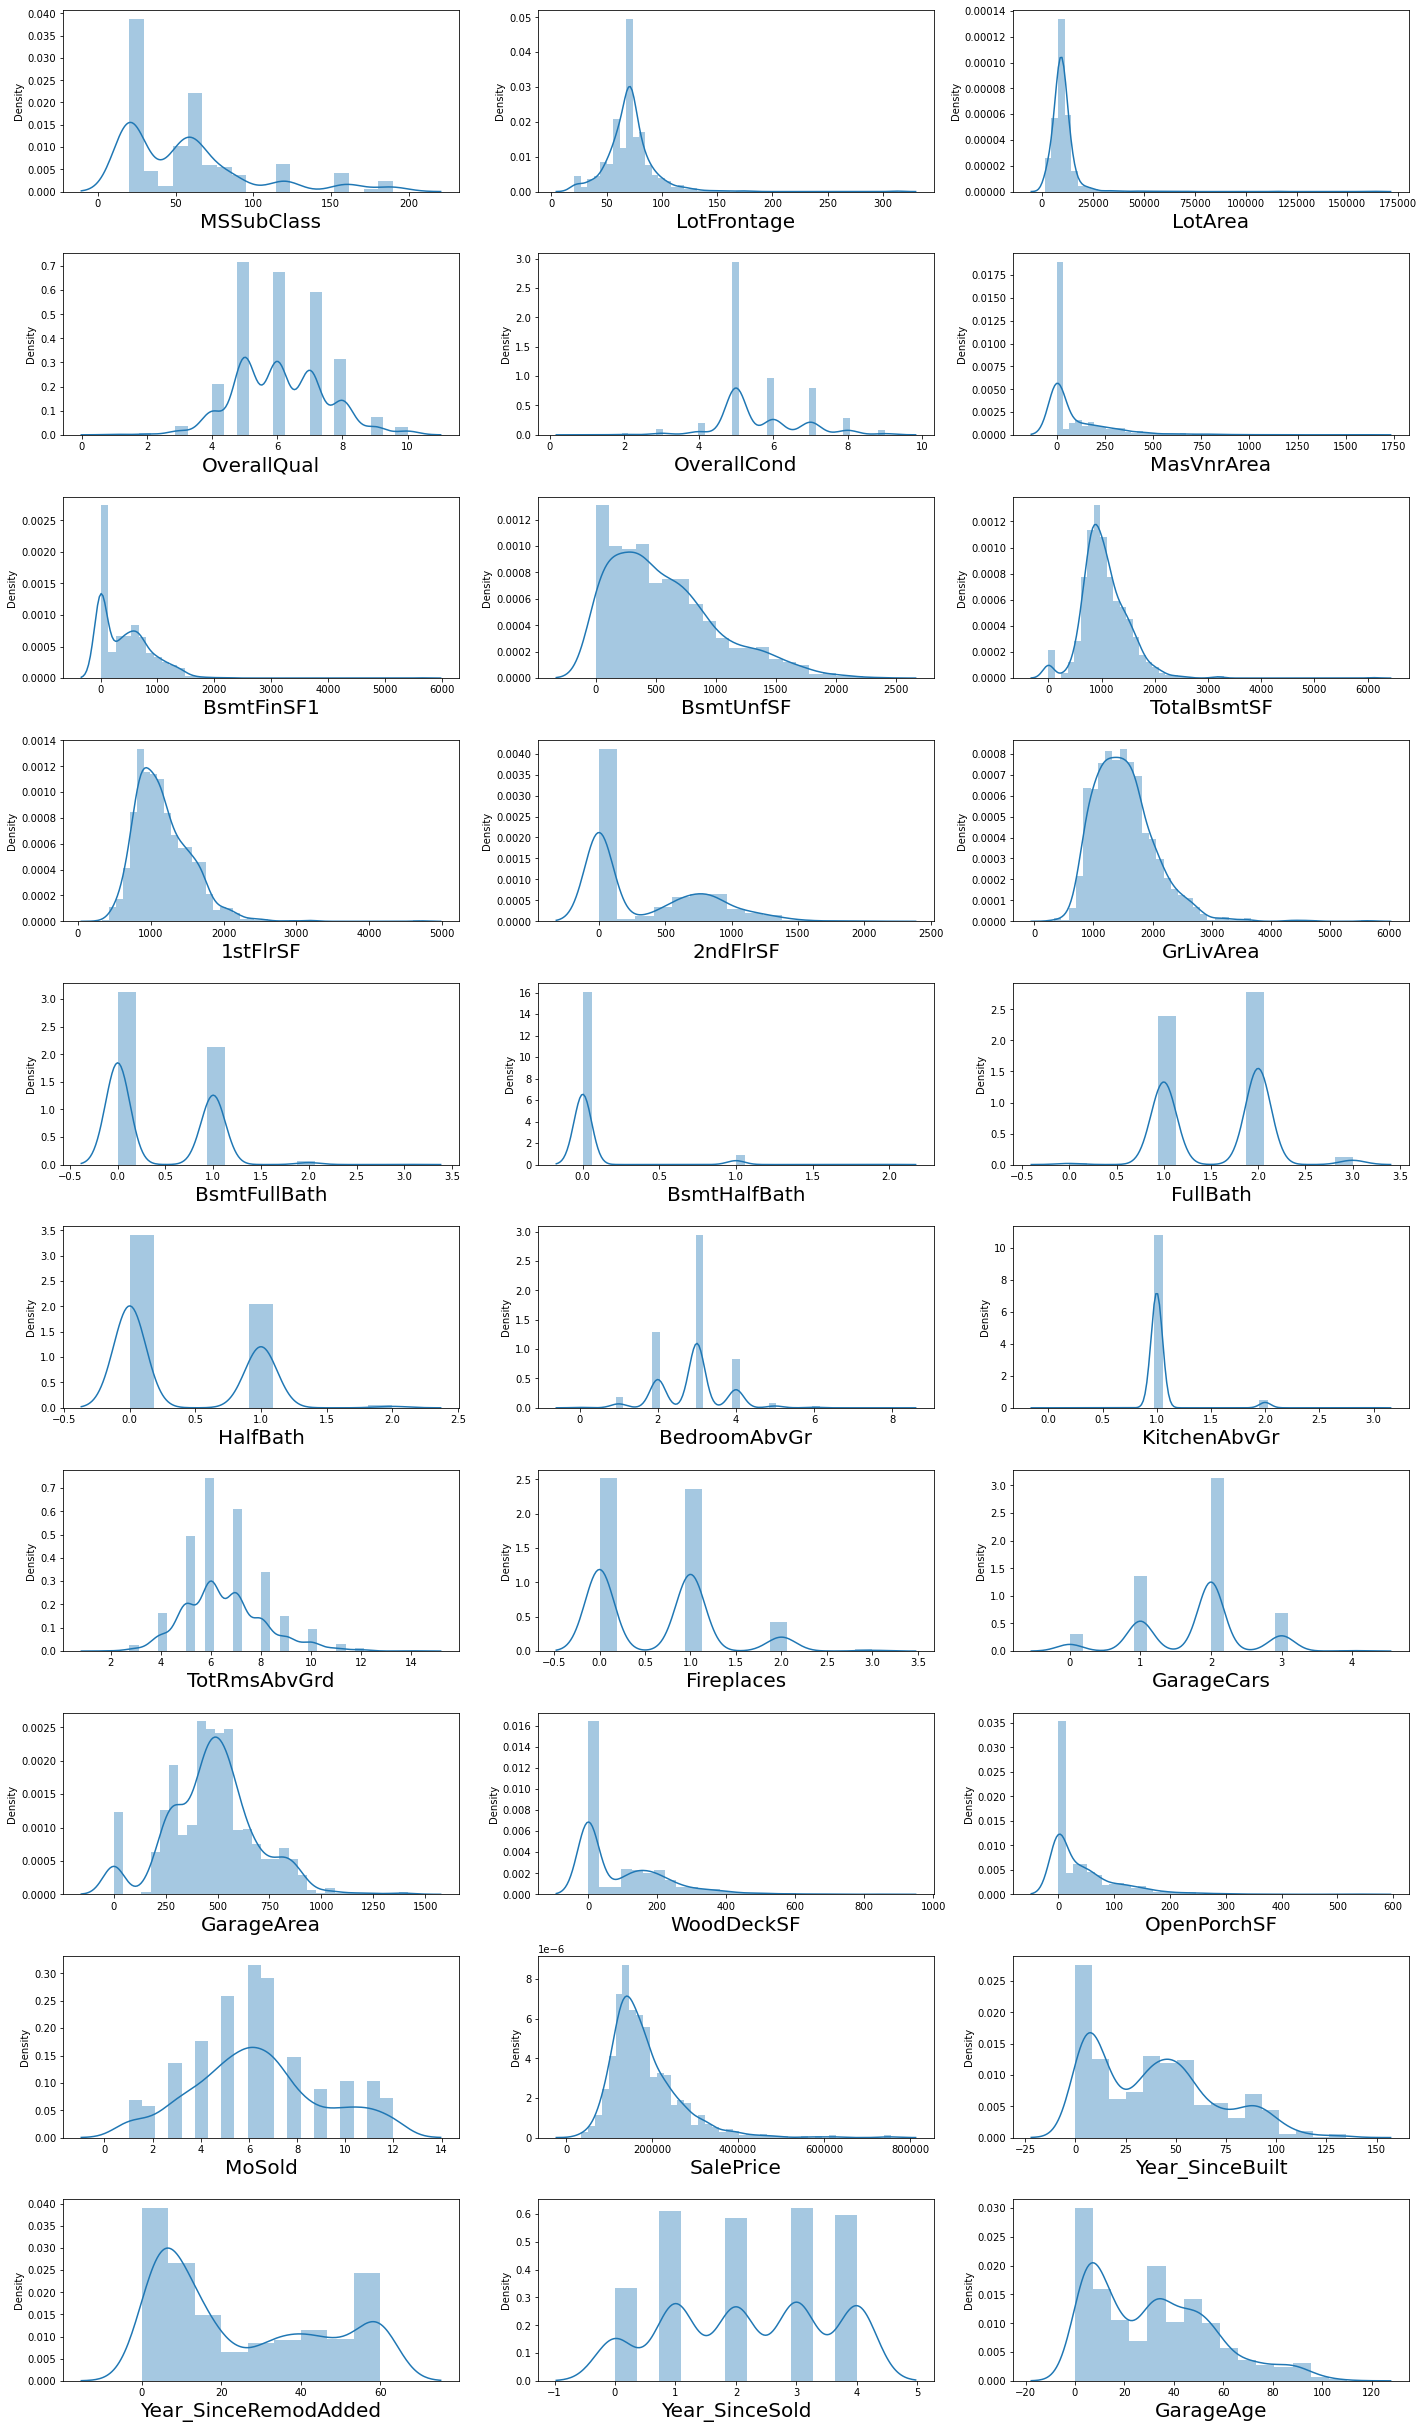

In [48]:
#Distribution plot for all numerical columns
plt.figure(figsize = (20,40))
plotnumber = 1
for column in df[numerical_columns]:
    if plotnumber <=35:
        ax = plt.subplot(12,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

There is skewness in almost all numerical columns.I have to remove this skewness. 

# Univariate analysis for categorical columns:

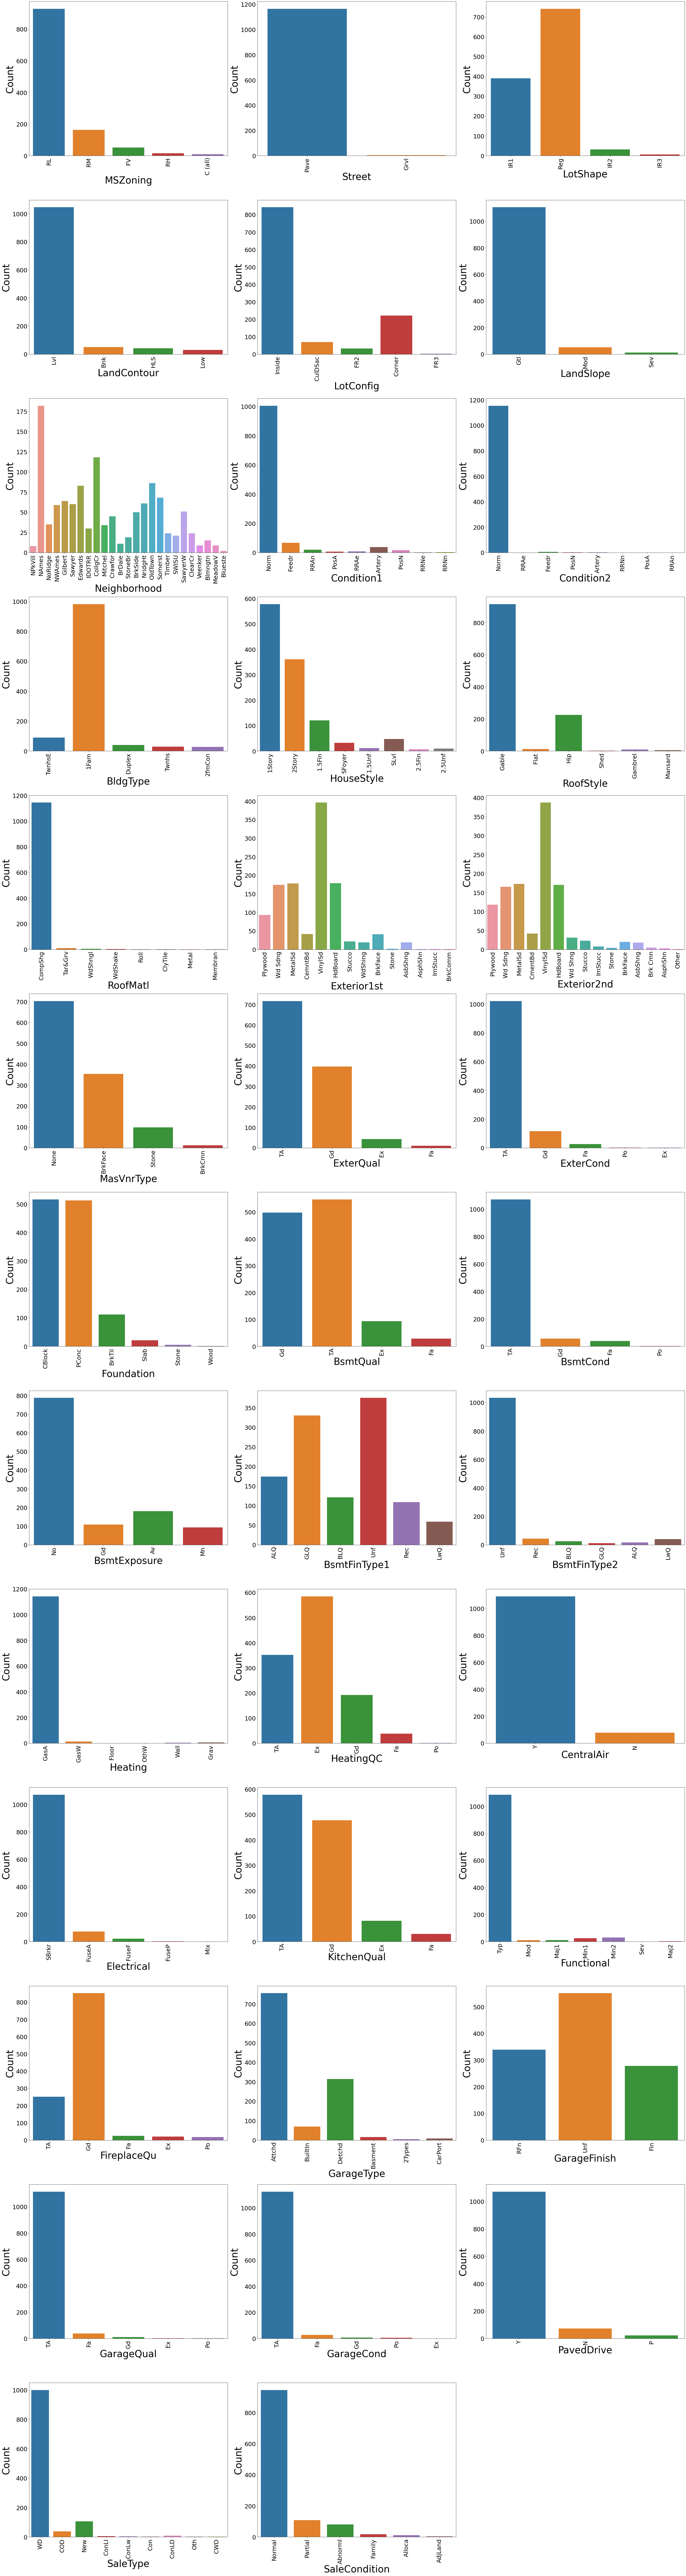

In [49]:
#Bar plot for all categorical columns
plt.figure(figsize = (40,150))
plotnumber = 1
for column in df[categorical_columns]:
    if plotnumber <=40:
        ax = plt.subplot(13,3,plotnumber)
        sns.countplot(df[column])
        plt.xticks(rotation=90,fontsize = 25)
        plt.yticks(rotation=0,fontsize = 25)
        plt.xlabel(column,fontsize = 40)
        plt.ylabel('Count',fontsize = 40)
    plotnumber+=1
plt.tight_layout()

**Observations:**
- 1. It is found that Residential Low Density zoning has maximum count, for the feature general zoning classification of the sale(MSZoning).
- 2. In Paved streets we can observe maximum count, for the feature Type of road access to property(Street).
- 3. Regular shaped property has maximum count, for the feature General shape of property(LotShape).
- 4. Near Flat/Level property has maximum count, for the feature Flatness of the property(LandContour).
- 5. Inside lot configured property has maximum count, for the feature Lot configuration(LotConfig).
- 6. Gentle sloped property has maximum count, for the feature Slope of property(LandSlope).
- 7.  If the property is located in North Ames then count is good compared to other locations, for the feature Physical locations within Ames city limits(Neighborhood).
- 8. If the Proximity to various conditions-1 is normal then count is high for the feature Proximity to various conditions(Condition1).
- 9. If the Proximity to various conditions-2 is normal then count is high for the feature Proximity to various conditions (if more than one is present)(Condition2).
- 10. Single-family Detached dwelling has maximum count for the feature Type of dwelling(BldgType).
- 11. One story dwelling housestyle has maximum count for the feature Style of dwelling(HouseStyle).
- 12. For Gable roof style the count is high for the feature Type of roof(RoofStyle).
- 13. For Standard (Composite) Shingle roof material the count is high for the feature Roof material(RoofMatl).
- 14. For Vinyl Siding exterior-1 covering on house has maximum counts for the feature Exterior covering on house(Exterior1st).
- 15. For Vinyl Siding exterior-2 covering on house has maximum counts for the feature Exterior covering on house (if more than one material)(Exterior2nd).
- 16. For Masonry veneer type(MasVnrType) None has maximum count.
- 17.For Typical/Average(TA) quality of the material on the exterior has maximum count, for the feature Evaluates the quality of the material on the exterior (ExterQual).
- 18. For Typical/Average(TA) condition of the material on the exterior has maximum count for the feature Evaluates the present condition of the material on the exterior(ExterCond).
- 19. For Cinder Block and Poured Contrete foundations the count is maximum for the feature Type of foundation(Foundation).
- 20. For good and average quality heights of the basement the count is high for the feature Evaluates the height of the basement(BsmtQual).
- 21. For Typical/Average(TA) general condition of the basement the count is high for the feature Evaluates the general condition of the basement(BsmtCond)
- 22. For No Exposure garden level walls the count is maximum for the feature Refers to walkout or garden level walls(BsmtExposure).
- 23. For unfinished Rating of basement finished area-1 the count is maximum for the feature Rating of basement finished area(BsmtFinType1).
- 24. For unfinished Rating of basement finished area-2 the count is maximum for the feature Rating of basement finished area (if multiple types)(BsmtFinType2).
- 25. For Gas forced warm air furnace type of heating the count is maximum for the feature Type of heating(Heating).
- 26. For Excellent Heating quality and condition the count is high for the feature Heating quality and condition(HeatingQC).
- 27. For Central air conditioning-yes has maximum count for the feature Central air conditioning(CentralAir).
- 28. For Standard Circuit Breakers & Romex Electrical system the count is high for the feature Electrical system(Electrical).
- 29. For Typical/Average(TA) and good Kitchen quality the count is maximum for the feature Kitchen quality(KitchenQual).
- 30. Typical Functionality has highest count for Home functionality (Assume typical unless deductions are warranted)(Functional).
- 31. For good Fireplace quality the count is high for the feature Fireplace quality(FireplaceQu).
- 32. If Garage location Attached to home then the count is high, for the feature Garage location(GarageType).
- 33. For Unfinished Interior of the garage the count is maximum, for the feature Interior finish of the garage(GarageFinish).
- 34. For Typical/Average(TA) Garage quality the count is high, for the feature Garage quality(GarageQual).
- 35. For Typical/Average(TA) Garage condition the count is high, for the feature Garage condition(GarageCond).
- 36. For Paved driveway the count is maximum, for the feature Paved driveway(PavedDrive).
- 37. For Warranty Deed - Conventional type of sales the count is maximum, for the feature Type of sale(SaleType).
- 38. For Normal sales condition the count is high, for the feature Condition of sale(SaleCondition).

# Bivariate Analysis:

# Bivariate Analysis for numerical columns:

In [50]:
col=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','Year_SinceBuilt','Year_SinceRemodAdded','GarageAge']

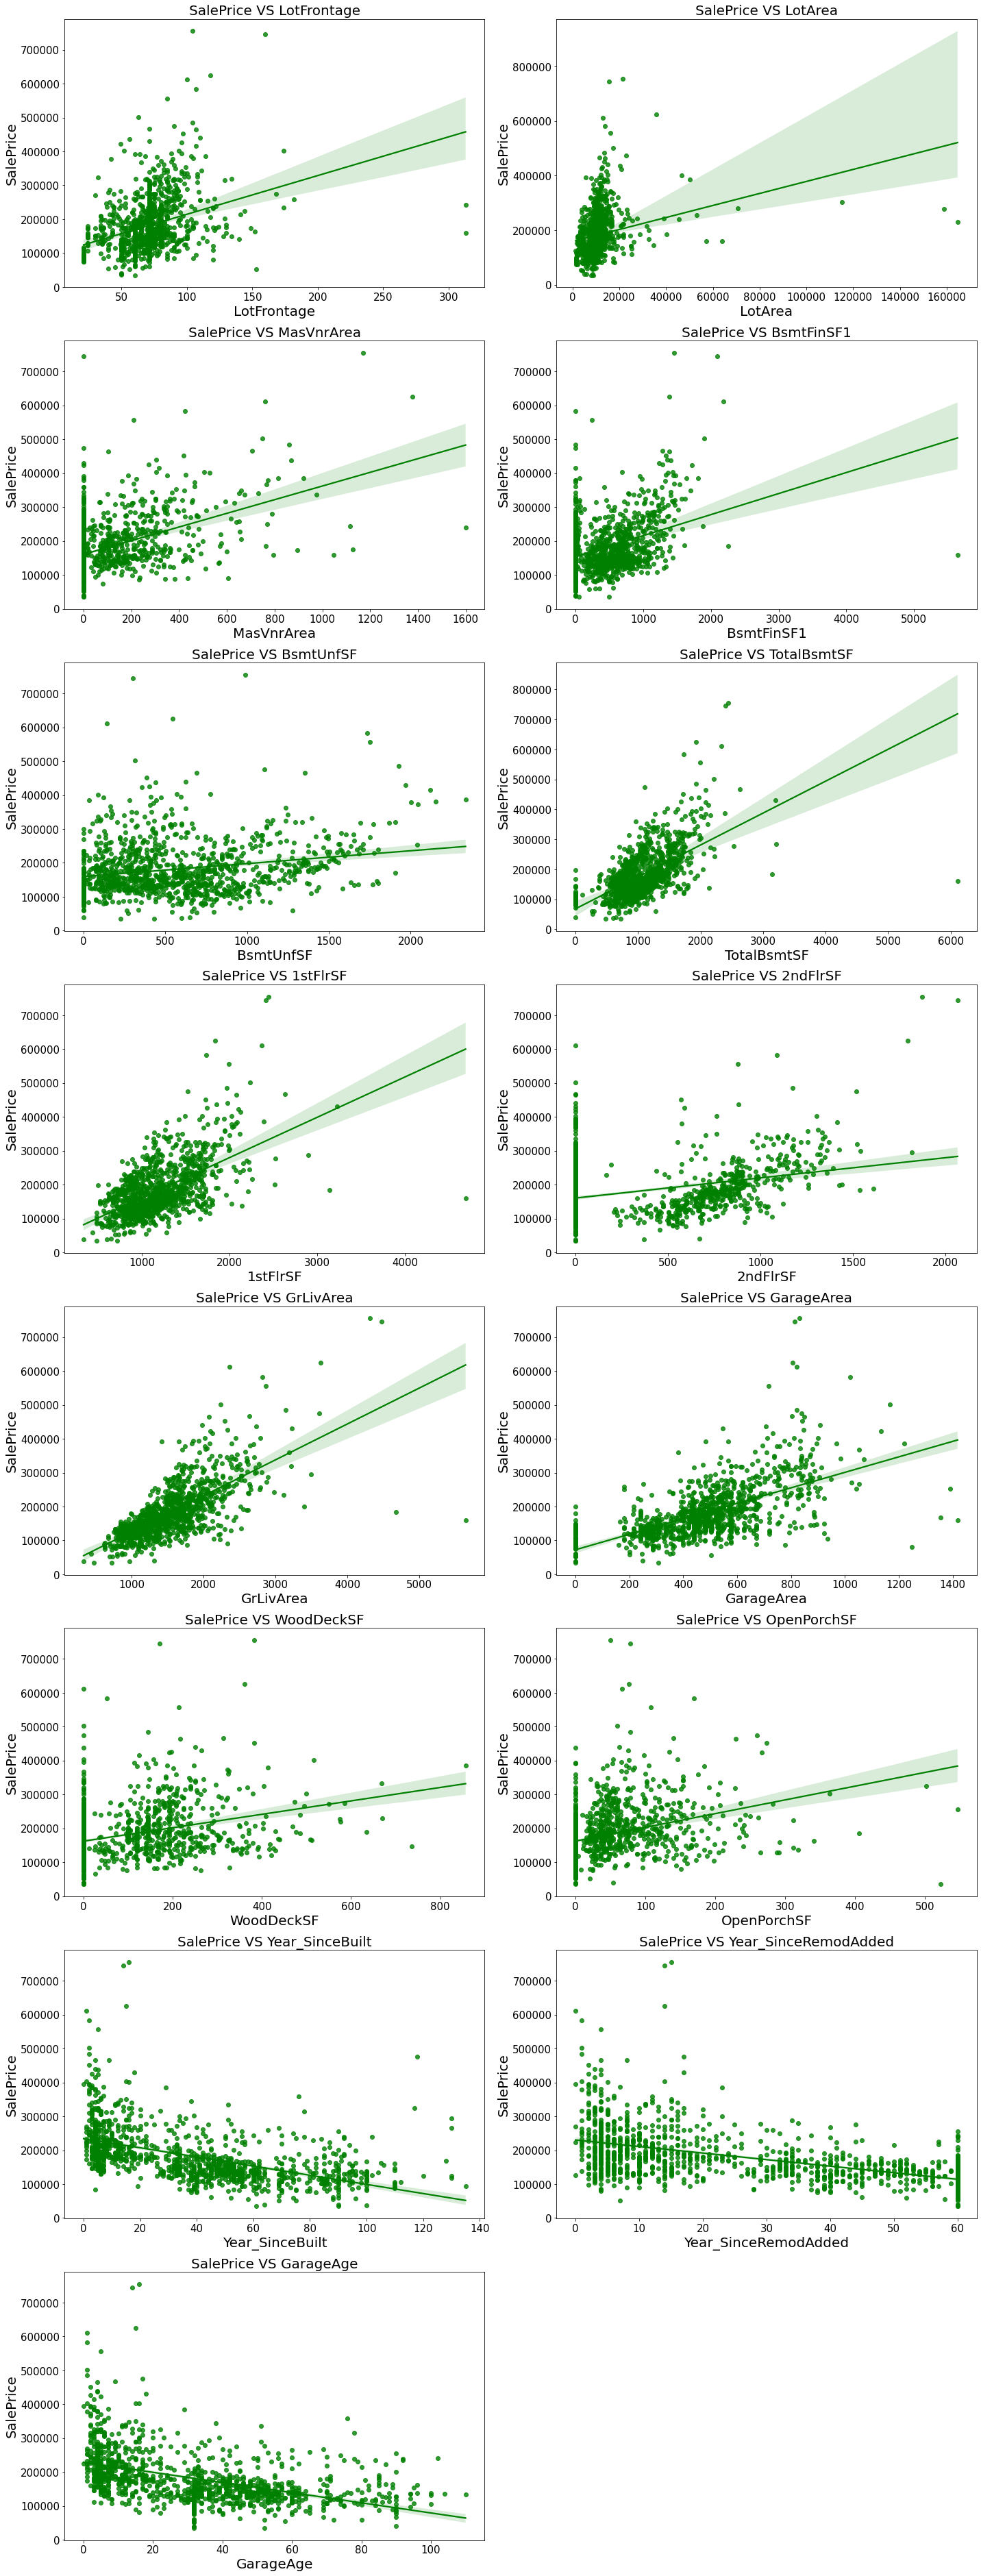

In [51]:
#regplot for numerical columns
plt.figure(figsize=(20,130))
for i in range(len(col)):
    plt.subplot(20,2,i+1)
    sns.regplot(x=df[col[i]] , y=df['SalePrice'],color="g")
    plt.title(f"SalePrice VS {col[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col[i],fontsize = 20)
    plt.ylabel('SalePrice',fontsize = 20)
    plt.tight_layout()

**Observations:**
- 1.As Linear feet of street connected to property(LotFrontage) is increseing sales is decreasing and the SalePrice is rangeing between 0-3 lakhs.
- 2.As Lot size in square feet(LotArea) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
- 3.As Masonry veneer area in square feet(MasVnrArea) is increasing sales is decreasing and saleprice is rangeing between 0-4 lakhs.
- 4.As Type 1 finished square feet(BsmtFinSF1) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
- 5.As Unfinished square feet of basement area(BsmtUnfSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs. There are some outliers also.
- 6.As Total square feet of basement area(TotalBsmtSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
- 7.As First Floor square feet(1stFlrSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
- 8.As Second floor square feet(2ndFlrSF) is increseing sales is increasing in the range 500-1000 and the saleprice is in between 0-4 lakhs.
- 9.As Above grade (ground) living area square feet(GrLivArea) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
- 10.As Size of garage in square feet(GarageArea) is increseing sales is increseing and the saleprice is in between 0-4 lakhs.
- 11.As Wood deck area in square feet(WoodDeckSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
- 12.As Open porch area in square feet(OpenPorchSF) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.
- 13.As Year_SinceBuilt is increseing sales is decreasing and the saleprice is high for newly built building and the sales price is in between 0-4 lakhs.
- 14.As Since Remodel date (same as construction date if no remodeling or additions)(Year_SinceRemodAdded) is increseing sales is decreasing and the saleprice is in between 1-4 lakhs.
- 15.As Since Year garage was built(GarageAge) is increseing sales is decreasing and the saleprice is in between 0-4 lakhs.

In [52]:
col1=['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','Year_SinceSold']

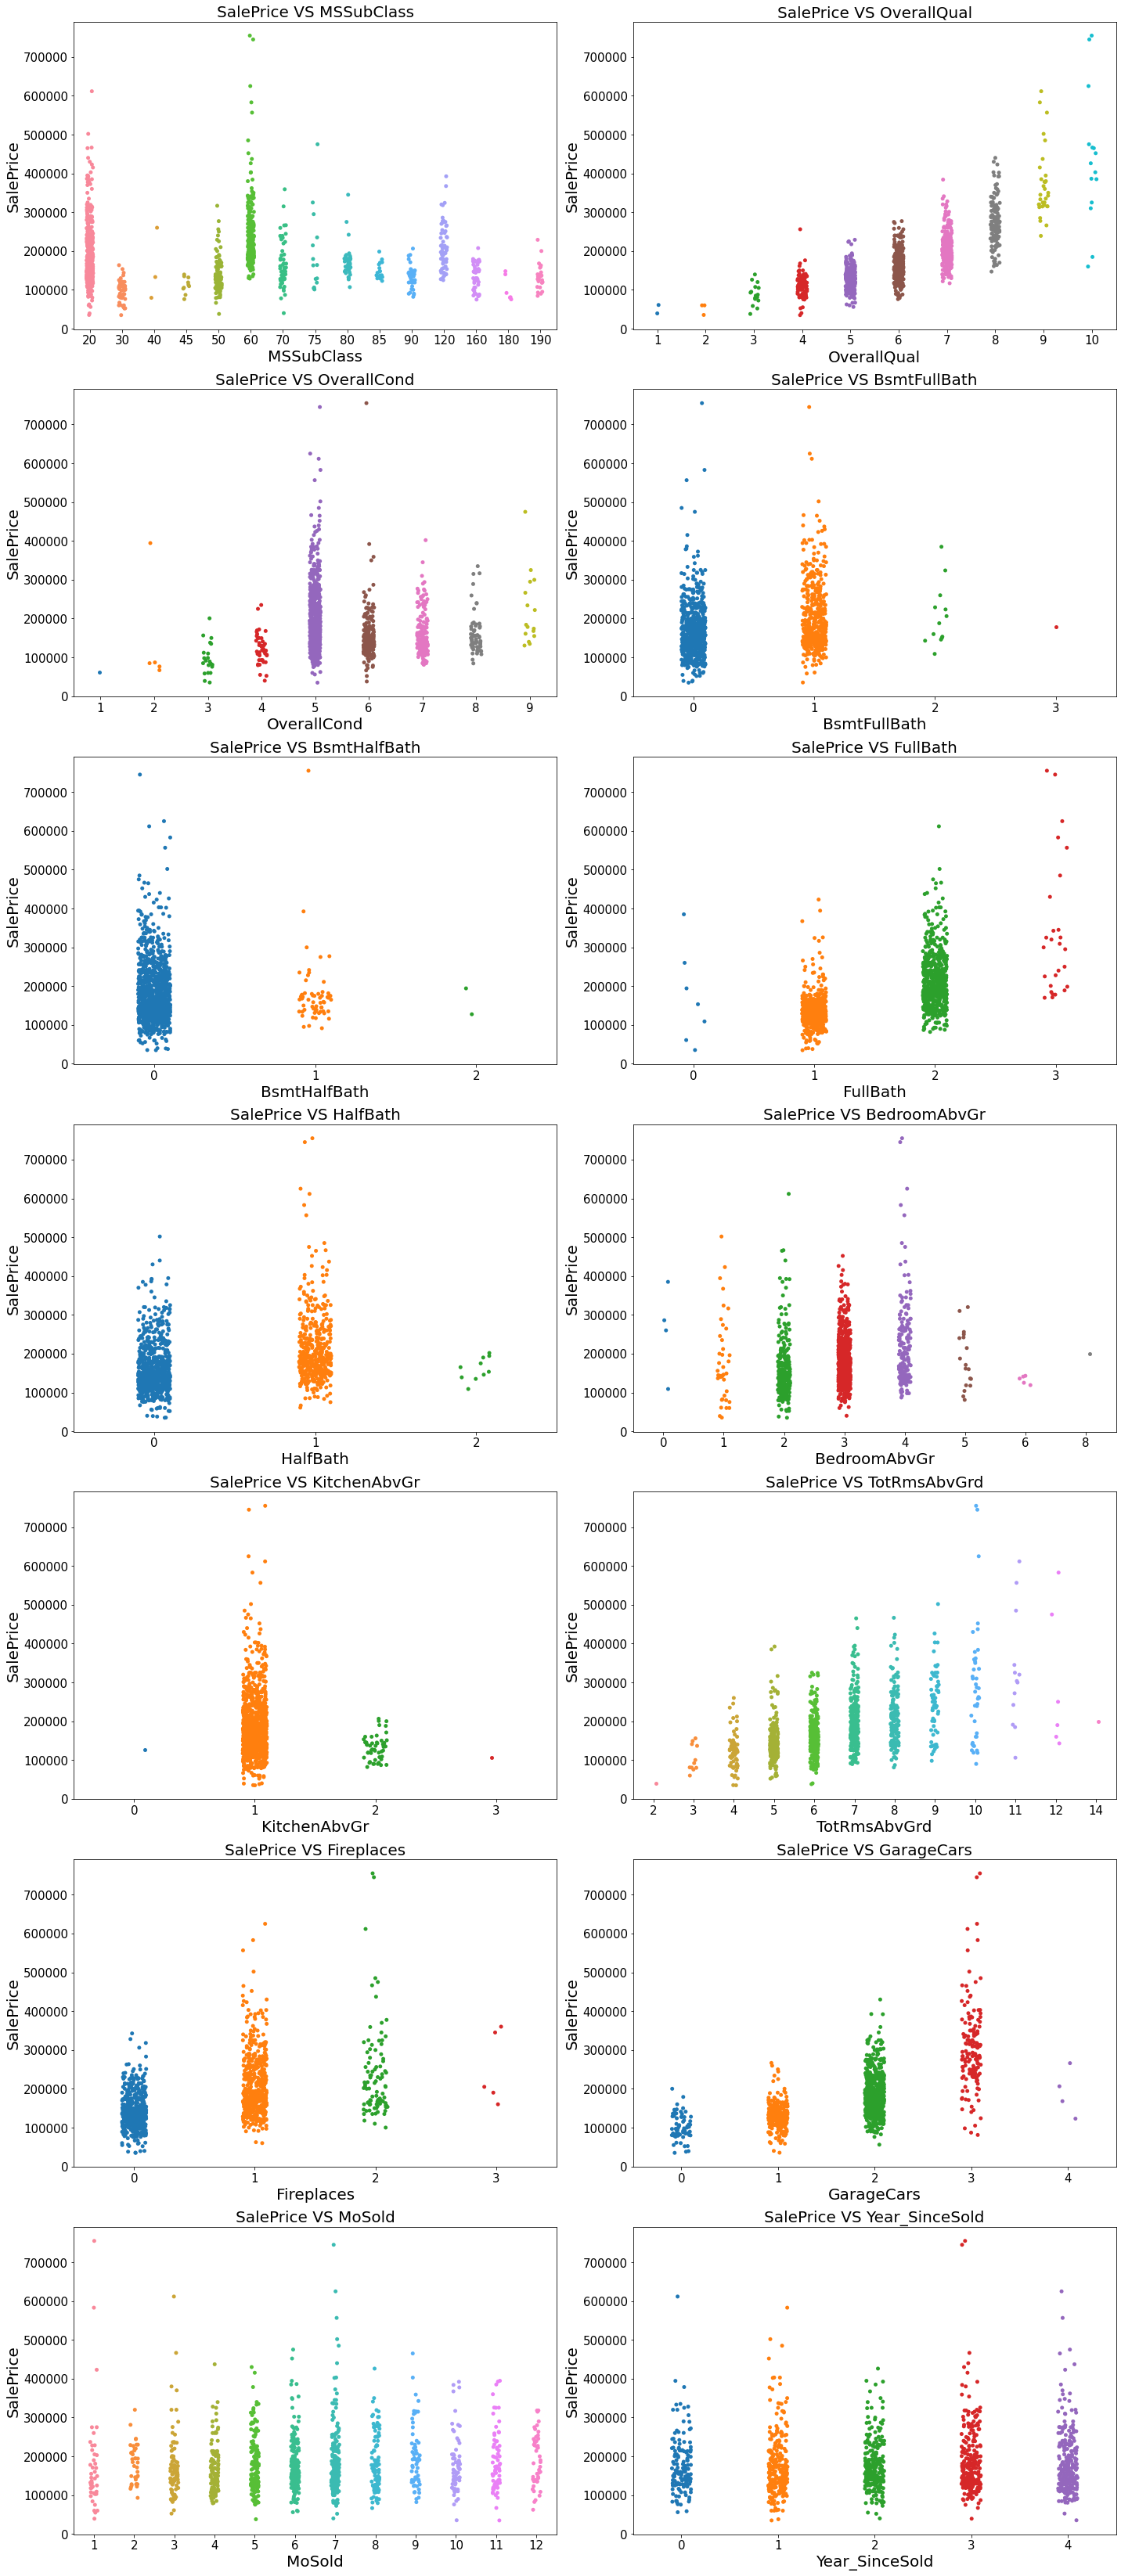

In [53]:
#stripplot for numerical columns
plt.figure(figsize=(20,130))
for i in range(len(col1)):
    plt.subplot(20,2,i+1)
    sns.stripplot(x=df[col1[i]] , y=df['SalePrice'])
    plt.title(f"SalePrice VS {col1[i]}",fontsize=20)
    plt.xticks(fontsize=15)  
    plt.yticks(fontsize=15)
    plt.xlabel(col1[i],fontsize = 20)
    plt.ylabel('SalePrice',fontsize = 20)
    plt.tight_layout()

**Observations:**
- 1.For 1-STORY 1946 & NEWER ALL STYLES(20) and 2-STORY 1946 & NEWER(60) types of dwelling(MSSuubClass) the sales is good and SalePrice is also high.
- 2.As Rates the overall material and finish of the house(OverallQual) is increasing linearly sales is also increasing And SalePrice is also increasing linearly.
- 3.For 5(Average) overall condition of the house(OverallCond) the sales is high and SalePrice is also high. 
- 4.For 0 and 1 Basement full bathrooms(BsmtFullBath) the sales as well as SalePrice is high.
- 5.For 0 Basement half bathrooms(BsmtHalfBath) the sales as well as SalePrice is high.
- 6.For 1 and 2 Full bathrooms above grade(FullBath) the sales as well as SalePrice is high.
- 7.For 0 and 1 Half baths above grade(HalfBath) the sales as well as SalePrice is high. 
- 8.For 2, 3 and 4 Bedrooms above grade (does NOT include basement bedrooms)(BedroomAbvGr) the sales as well as SalePrice is high.
- 9.For 1 Kitchens above grade(KitchenAbvGr) the sales as well as SalePrice is high. 
- 10.For 4-9 Total rooms above grade (does not include bathrooms)(TotRmsAbvGrd) the sales as well as SalePrice is high.
- 11.For 0 and 1 Number of fireplaces(Fireplaces) the sales as well as SalePrice is high.
- 12.For 1 and 2 Size of garage in car capacity(GarageCars) the sales is high and for 3 Size of garage in car capacity(GarageCars) the SalePrice is high.
- 13.In between april to august for Month Sold(MoSold) the sales is good with SalePrice.
- 14.For all the Year_SinceSold the salePrice and sales both are same.

# Bivariate Analysis for Categorical Columns:

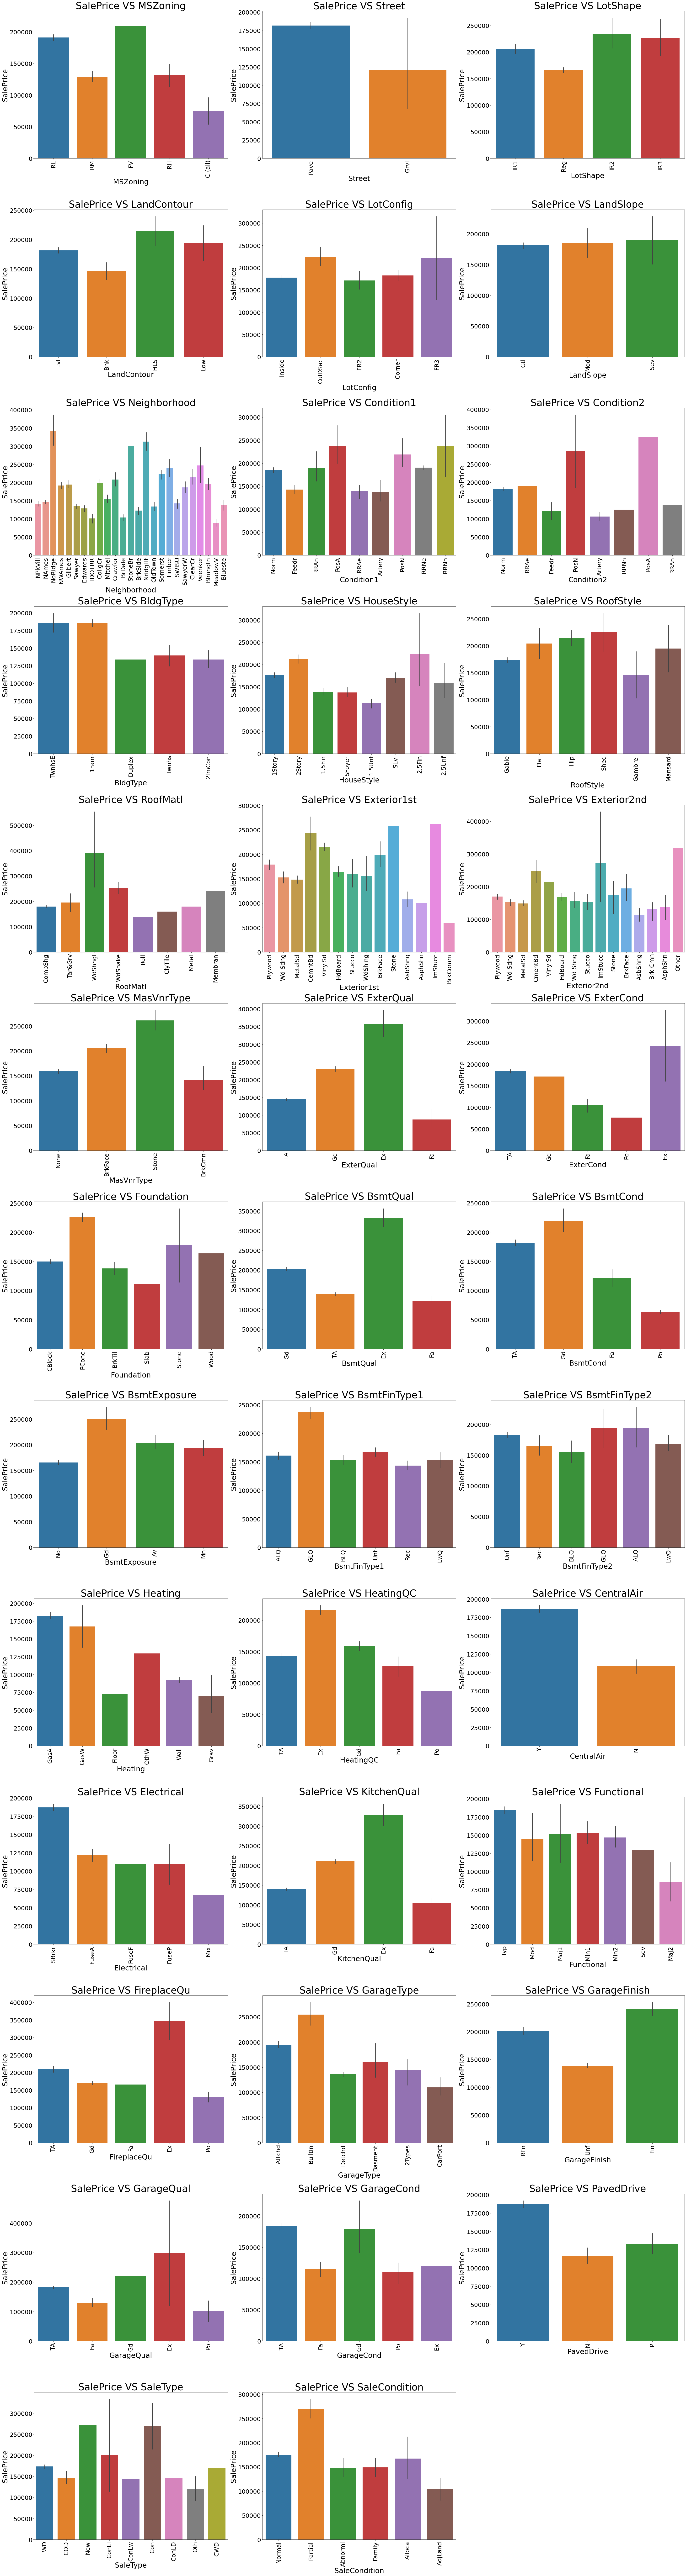

In [54]:
#Bar plot for all categorical columns
plt.figure(figsize=(40,150))
for i in range(len(categorical_columns)):
    plt.subplot(13,3,i+1)
    sns.barplot(y=df['SalePrice'],x=df[categorical_columns[i]])
    plt.title(f"SalePrice VS {categorical_columns[i]}",fontsize=40)
    plt.xticks(rotation=90,fontsize=25)  
    plt.yticks(rotation=0,fontsize=25)
    plt.xlabel(categorical_columns[i],fontsize = 30)
    plt.ylabel('SalePrice',fontsize = 30)
    plt.tight_layout()

**Observations:**
- 1. For Floating Village Residential(FV) and Residential Low Density(RL) zoning classification of the sale(MSZoning) the saleprice is high.
- 2. For paved type of road access to property(Street) the SalePrice is high.
- 3. For Slightly irregular(IR1), Moderately Irregular(IR2) and Irregular(IR3) shape of property(LotShape) the SalePrice is high.
- 4. For Hillside - Significant slope from side to side(HLS) Flatness of the property(LandContour) the SalePrice is High.
- 5. For Cul-de-sac(CulDSac) Lot configuration(LotConfig) the SalePrice is High.
- 6. For all types of Slope of property(LandSlope) i.e.,Gentle slope(Gtl), Moderate Slope(Mod) and Severe Slope(Sev) the SalePrice is High.
- 7. For Northridge(NoRidge) locations within Ames city limits(Neighborhood) the SalePrice is High.
- 8. For Within 200' of North-South Railroad(RRNn), Adjacent to postive off-site feature(PosA) and Near positive off-site feature--park, greenbelt, etc.(PosN) Proximity to various conditions(Condition1) has the maximum SalePrice.
- 9. For Adjacent to postive off-site feature(PosA) and Near positive off-site feature--park, greenbelt, etc.(PosN) Proximity to various conditions (if more than one is present)(Condition2) has maximum SalePrice.
- 10. For Single-family Detached(1Fam) and Townhouse End Unit(TwnhsE) type of dwelling(BldgType) the SalePrice is high.
- 11. For 2Story and Two and one-half story: 2nd level finished(2.5Fin) Style of dwelling(HouseStyle) the SalePrice is high.
- 12. For Shed Type of roof(RoofStyle) the SalePrice is high.
- 13. For Wood Shingles(WdShngl) Roof material(RoofMat1) the SalePrice is high.
- 14. For Cement Board(CemntBd), Imitation Stucco(ImStucc) and Stone type of Exterior covering on house(Exterior1st) the SalePrice is high.
- 15. For Cement Board(CemntBd), Imitation Stucco(ImStucc) and other Exterior covering on house (if more than one material)(Exterior2) has maximum SalePrice.
- 16. For Stone Masonry veneer type(MasvnrType) the SalePrice is high.
- 17. For Excellent(Ex) quality of the material on the exterior(ExterQual) the SalePrice is high.
- 18. For Excellent(Ex) present condition of the material on the exterior(ExterCond) the SalePrice is high.
- 19. For Poured Contrete(PConc) Type of foundation(Foundation) the SalePrice is high.
- 20. For Excellent(100+ inches)(Ex) height of the basement(BsmtQual) the SalePrice is high.
- 21. For Good(Gd) general condition of the basement(BsmtCond) the SalePrice is high.
- 22. For Good Exposure(Gd) of walkout or garden level walls(BsmtExposure) has maximum SalePrice.
- 23. For Good Living Quarters(GLQ) of basement finished area(BsmtFinType1) has maximum SalePrice.
- 24. For Good Living Quarters(GLQ) and Average Living Quarters(ALQ) of basement finished area (if multiple types)(BsmtFinType2) has maximum SalePrice. 
- 25. For Gas forced warm air furnace(GasA) and	Gas hot water or steam heat(GasW) Type of heating(Heating) has high SalePrice.
- 26. For Excellent(Ex) Heating quality and condition(HeatingQC) the SalePriceis high.
- 27. For building having Central air conditioning(CentralAir) the SalePrice is high.
- 28. For Standard Circuit Breakers & Romex(Sbrkr) of Electrical system(Electrical) the SalePrice is Maximum.
- 29. For Excellent(Ex) Kitchen quality(KitchenQual) the SalePrice is high.
- 30. For Typical Functionality(Typ) type of Home functionality (Assume typical unless deductions are warranted)(Functional) the SalePrice is high.
- 31. For Excellent - Exceptional Masonry Fireplace(Ex) of Fireplace quality(FireplaceQual) has highest SalePrice. 
- 32. For Built-In (Garage part of house - typically has room above garage)(BuiltIn) Garage location(GarageType) the SalePrice is maximum.
- 33. For Completely finished(Fin) Interior of the garage(GarageFinish) the SalePrice is high.
- 34. For Excellent(Ex) Garage quality(GarageQual) the SalePrice is high.
- 35. For Typical/Average(TA) and Good(Gd) Garage condition(GarageCond) the SalePrice is high.
- 36. For having Paved driveway(PavedDrive) the SalePriceis high.
- 37. For Home just constructed and sold(New) and Contract 15% Down payment regular terms(Con) of type of sale(SaleType) has highest SalePrice.
- 38. For Home was not completed when last assessed (associated with New Homes)(Partial) Condition of sale(SalesCondition) the SalePrice is maximum.

# Checking for outliers:

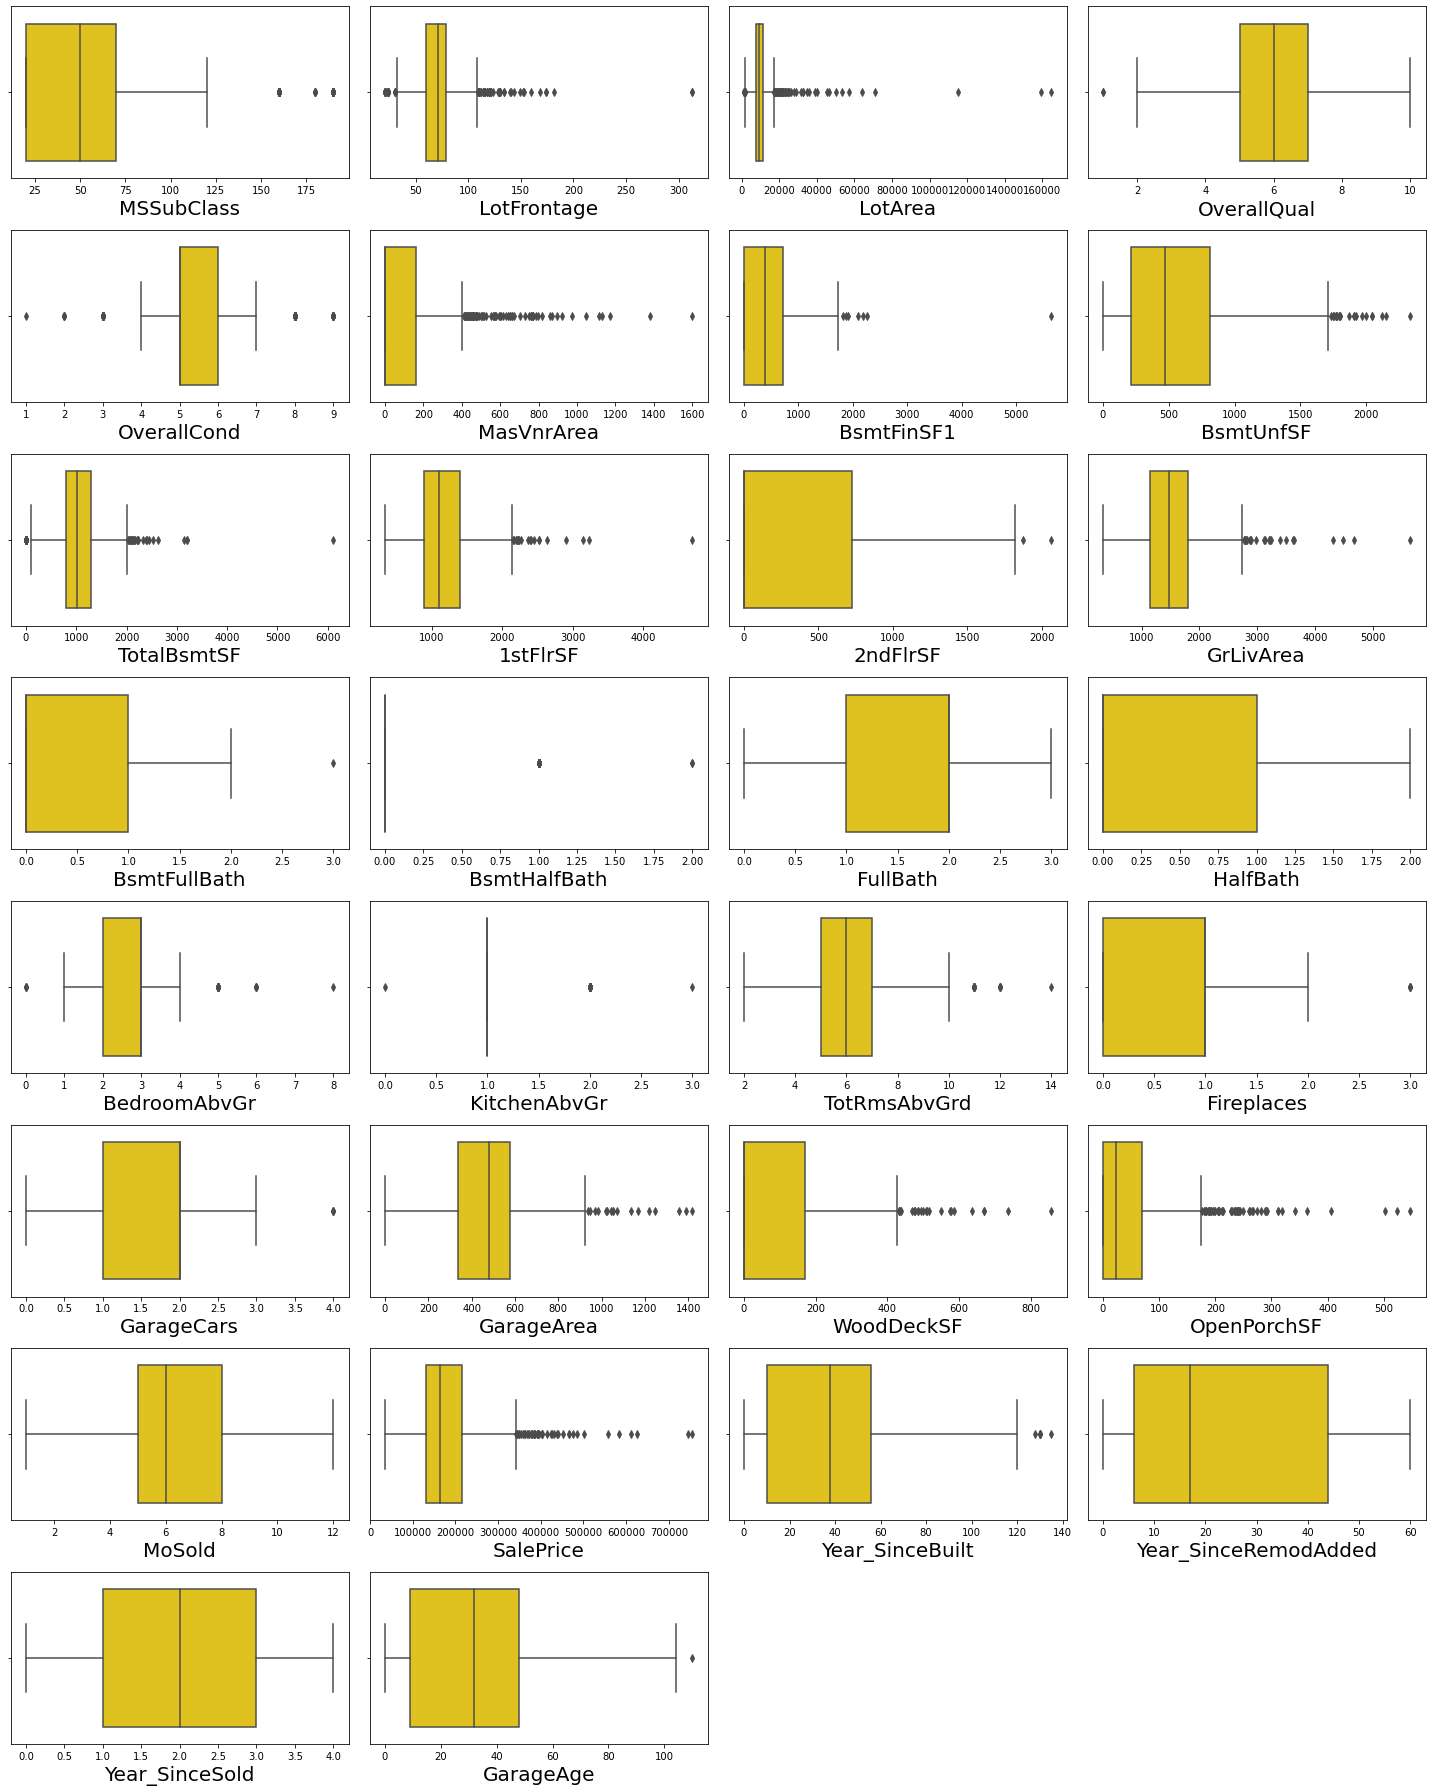

In [55]:
# Identifying the outliers using boxplot in train dataset

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

The columns with outliers in train dataset are
- MSSubClass
- LotFrontage
- LotArea
- OverallQual
- OverallCond
- MasVnrArea
- BsmtFinSF1
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- GrLivArea
- BsmtFullBath
- BsmtHalfBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- GarageCars
- GarageArea
- WoodDeckSF
- OpenPorchSF
- Year_SinceBuilt
- GarageAge
- SalePrice

 Since SalePrice is my target i should not remove outliers from this column.And MSSubClass, OverallQual and OverallCond are seems to be categorical so let me not remove outliers in this columns.

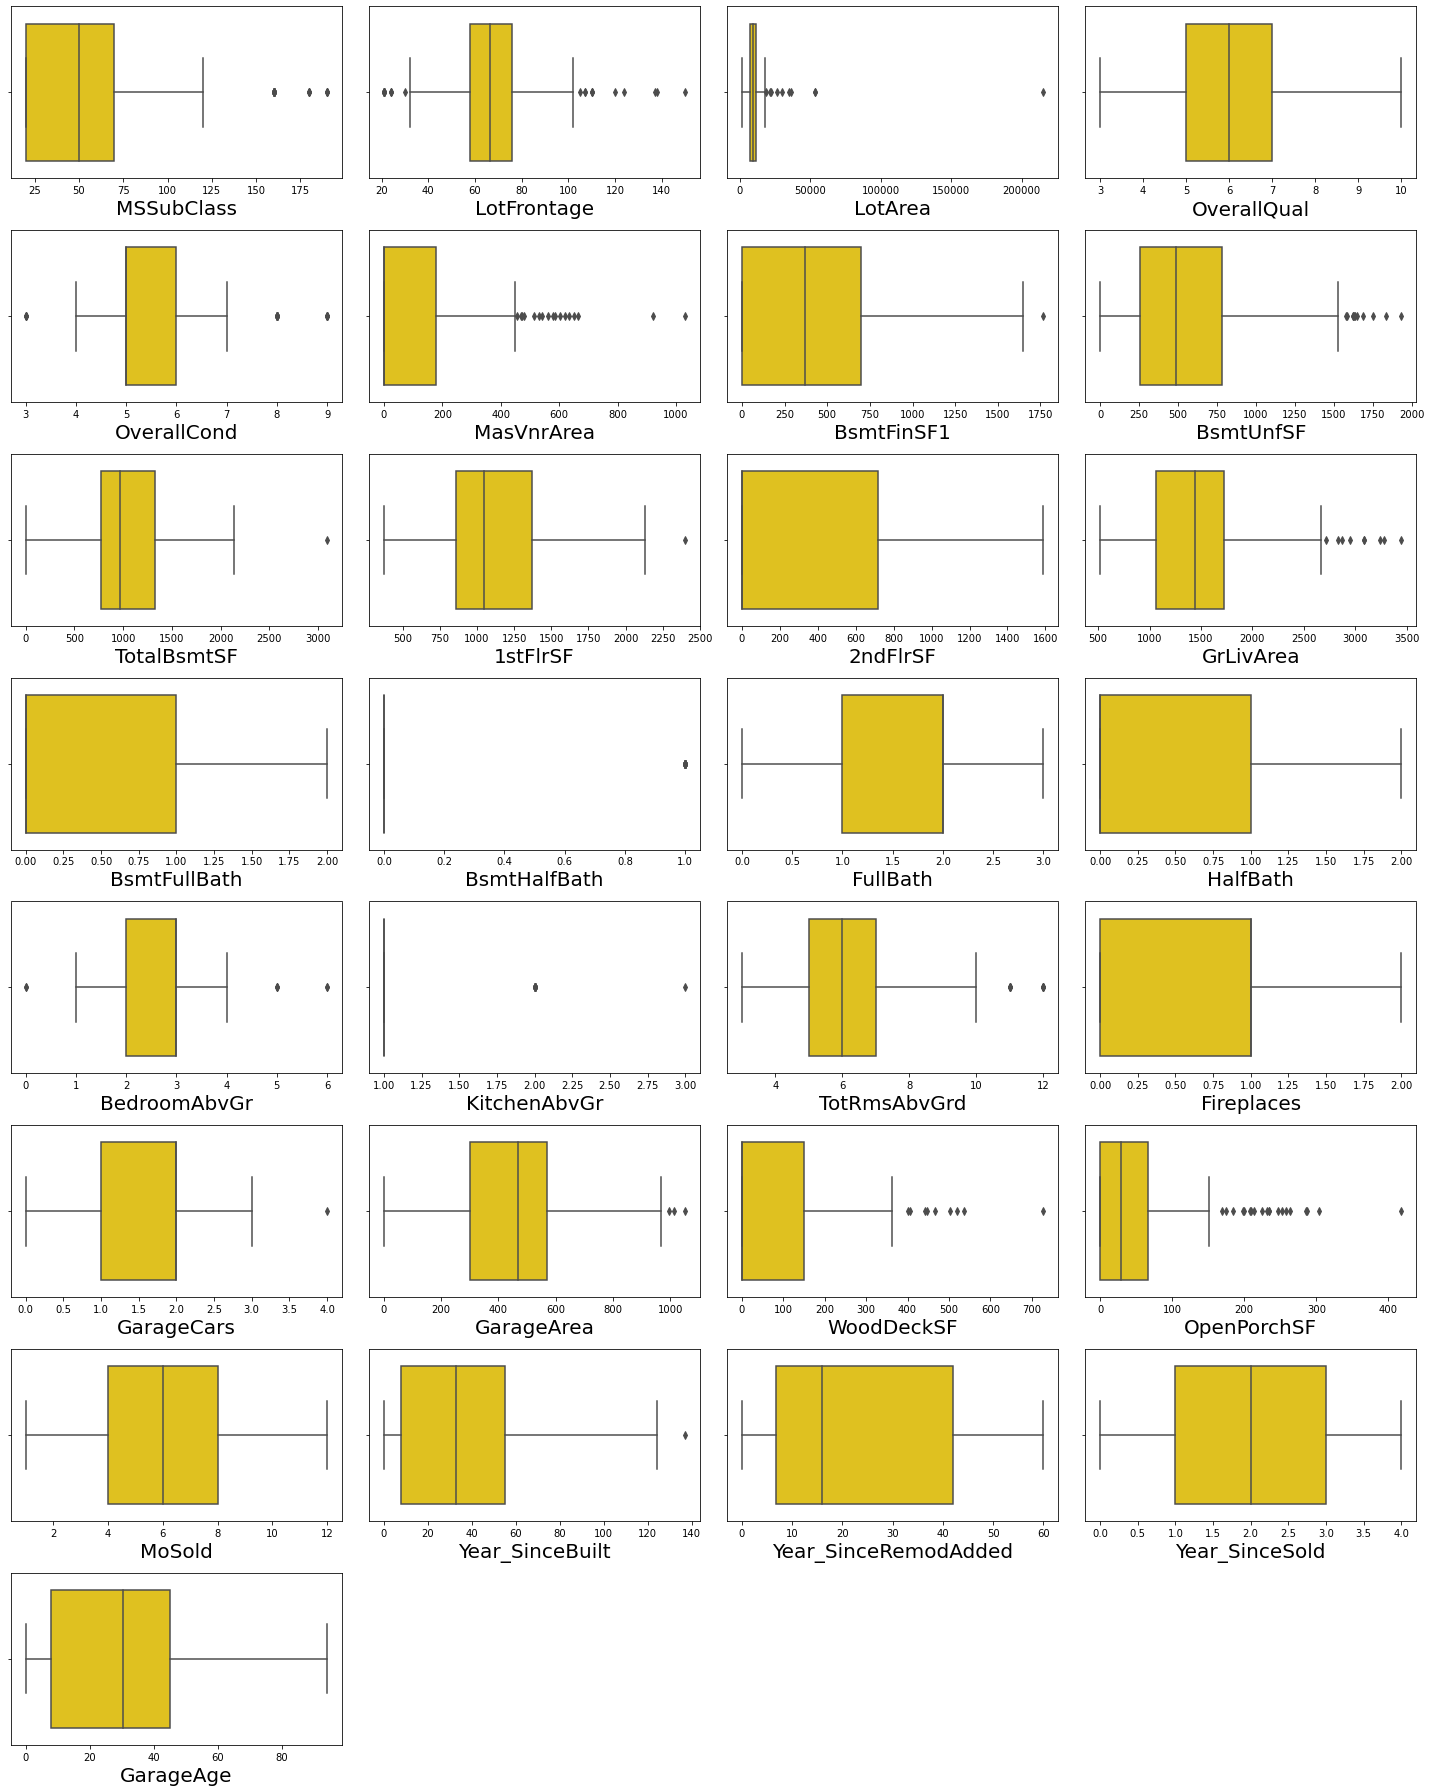

In [56]:
# Identifying the outliers using boxplot in test dataset

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns1:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(dff[column],color='gold')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

The columns with outliers in test dataset are

- MSSubClass
- LotFrontage
- LotArea
- OverallCond
- MasVnrArea
- BsmtFinSF1
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- GrLivArea
- BsmtHalfBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- GarageCars
- GarageArea
- WoodDeckSF
- OpenPorchSF
- Year_SinceBuilt

MSSubClass and OverallCond are seems to be categorical so let me not remove outliers in this columns.

# Removing Outliers in train dataset:

# i) Zscore method:

In [25]:
#Features having outliers in train dataset
features=df[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Year_SinceBuilt','GarageAge']]

Above are the list of columns with outliers in train dataset.

In [26]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL     70.98847     4928   Pave      IR1         Lvl   
1          20       RL     95.00000    15865   Pave      IR1         Lvl   
2          60       RL     92.00000     9920   Pave      IR1         Lvl   
3          20       RL    105.00000    11751   Pave      IR1         Lvl   
5          60       RL     58.00000    14054   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... WoodDeckSF OpenPorchSF MoSold  \
0    Inside       Gtl      NPkVill  ...          0         205      2   
1    Inside       Mod        NAmes  ...         81         207     10   
2   CulDSac       Gtl      NoRidge  ...        180         130      6   
3    Inside       Gtl       NWAmes  ...          0         122      1   
5    Inside       Gtl      Gilbert  ...        100          17     11   

  SaleType  SaleCondition  SalePrice Year_SinceBuilt Year_SinceRemodAdded  \
0       WD         Normal     128000              34                   34   
1       WD         Normal     268000              40                   40   
2       WD         Normal     269790              14                   13   
3      COD         Normal     190000              33                   33   
5      New        Partial     219210               4                    4   

  Year_SinceSold GarageAge  
0              3      33.0  
1              3      40.0  
2              3      13.0  
3              0      33.0  
5              4       4.0  

[5 rows x 68 columns]

I have removed the skewness using zscore method in train dataset.

In [27]:
#Checking shape of new train dataset
df_new.shape

(953, 68)

In my new train dataset i have 953 rows and 68 columns.

In [28]:
#Checking shape of old train dataset
df.shape

(1168, 68)

 In my old train dataset i was having 1168 rows and 68 columns.

In [29]:
#Checking dataloss in zscore method of train dataset
Dataloss = (((df.shape[0]-df_new.shape[0])/df.shape[0])*100)
Dataloss

18.40753424657534

In Z-score method for trian dataset the data loss is more than 10% so let me have a look into IQR method to remove outliers.

# ii) IQR method:

In [30]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness of train dataset using IQR method.

In [31]:
#Checking shape of new train dataset
df_1.shape

(780, 68)

In my new train dataset i have 780 rows and 68 columns.

In [32]:
#Checking shape of old train dataset
df.shape

(1168, 68)

In my old train dataset i was having 1168 rows and 68 columns.

In [33]:
#Checking dataloss in IQR method of train dataset
Dataloss = (((df.shape[0]-df_1.shape[0])/df.shape[0])*100)
Dataloss

33.21917808219178

In IQR method of train dataset the data loss is more than 10% so let me have a look into percentile method to remove outliers.

Since data loss is more than 10 % we will go with entire dataset to save dataloss in train dataset 

In [34]:
#Checking shape of  train dataset
df.shape

(1168, 68)

# Removing Outliers in test dataset:

# i) Zscore method:

In [35]:
#Features having outliers in test dataset
features1=dff[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','Year_SinceBuilt']]

Above are the list of columns with outliers in test dataset.

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(features1))
dff_new=dff[(z<3).all(axis=1)]
dff_new.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          20       RL    86.000000    14157   Pave      IR1         HLS   
1         120       RL    66.425101     5814   Pave      IR1         Lvl   
2          20       RL    66.425101    11838   Pave      Reg         Lvl   
3          70       RL    75.000000    12000   Pave      Reg         Bnk   
4          60       RL    86.000000    14598   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood  ... PavedDrive WoodDeckSF OpenPorchSF  \
0    Corner       Gtl      StoneBr  ...          Y        178          51   
1   CulDSac       Gtl      StoneBr  ...          Y         63           0   
2    Inside       Gtl      CollgCr  ...          Y        202         151   
3    Inside       Gtl      Crawfor  ...          Y          0           0   
4   CulDSac       Gtl      Somerst  ...          Y        100          18   

  MoSold  SaleType  SaleCondition Year_SinceBuilt Year_SinceRemodAdded  \
0      7        WD         Normal               4                    4   
1      8       COD        Abnorml              25                   26   
2      6        WD         Normal               8                    9   
3      7        WD         Normal              68                   60   
4      1        WD         Normal               2                    3   

  Year_SinceSold GarageAge  
0              3       5.0  
1              1      26.0  
2              1       9.0  
3              1      69.0  
4              2       3.0  

[5 rows x 67 columns]

I have removed the skewness using zscore method in test dataset.

In [37]:
#Checking shape of new test dataset
dff_new.shape

(235, 67)

In my new test dataset i have 235 rows and 67 columns.

In [38]:
#Checking shape of old test dataset
dff.shape

(292, 67)

In my old test dataset i was having 292 rows and 67 columns.

In [39]:
#Checking dataloss in zscore method of test dataset
Dataloss1 = (((292-235)/292)*100)
Dataloss1

19.52054794520548

In Z-score method for test dataset the data loss is more than 10% so let me have a look into IQR method to remove outliers.

# ii) IQR method:

In [40]:
# 1st quantile
Q1=features1.quantile(0.25)

# 3rd quantile
Q3=features1.quantile(0.75)

# IQR
IQR=Q3 - Q1

dff_1=dff[~((dff < (Q1 - 1.5 * IQR)) |(dff > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness of test dataset using IQR method.

In [41]:
#Checking shape of new test dataset
dff_1.shape

(185, 67)

In my new test dataset i have 185 rows and 67 columns.

In [42]:
#Checking shape of old test dataset
dff.shape

(292, 67)

In my old test dataset i was having 292 rows and 67 columns.

In [43]:
#Checking dataloss in IQR method of test dataset
Dataloss1 = (((292-185)/292)*100)
Dataloss1

36.64383561643836

In IQR method of test dataset the data loss is more than 10% so let me have a look into percentile method to remove outliers.

Since data loss is more than 10 % we will go with entire dataset to save dataloss in the test dataset

In [44]:
#Checking shape of  test dataset
dff.shape

(292, 67)

# Encoding

In [83]:
#Ordinal encoding for train dataset
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [84]:
#Ordinal encoding for test dataset
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in dff.columns:
    if dff[i].dtypes=='object':
        dff[i]=OE.fit_transform(dff[i].values.reshape(-1,1))

I have encoded all my categorical columns in train and test datasets using Ordinal encoder.

# Checking for skewness:

In [ ]:
#Separating features and label in train dataset:¶

In [85]:
x = df.drop("SalePrice",axis=1)
y = df["SalePrice"]

In [86]:
#Checking for skewness of train dataset
x.skew()

MSSubClass               1.422019
MSZoning                -1.796785
LotFrontage              2.710383
LotArea                 10.659285
Street                 -17.021969
LotShape                -0.603775
LandContour             -3.125982
LotConfig               -1.118821
LandSlope                4.812568
Neighborhood             0.043735
Condition1               3.008289
Condition2              11.514458
BldgType                 2.318657
HouseStyle               0.285680
OverallQual              0.175082
OverallCond              0.580714
RoofStyle                1.498560
RoofMatl                 7.577352
Exterior1st             -0.612816
Exterior2nd             -0.592349
MasVnrType              -0.104609
MasVnrArea               2.834658
ExterQual               -1.810843
ExterCond               -2.516219
Foundation              -0.002761
BsmtQual                -1.343781
BsmtCond                -3.293554
BsmtExposure            -1.166987
BsmtFinType1            -0.068901
BsmtFinSF1    

The columns with skewness in train dataset
- MSSubClass
- LotArea
- OverallCond
- MasVnrArea
- BsmtFinSF1
- BsmtUnfSF
- 1stFlrSF
- 2ndFlrSF
- GrLivArea
- BsmtHalfBath
- HalfBath
- KitchenAbvGr
- Fireplaces
- WoodDeckSF
- OpenPorchSF
- GarageAge

MSSubClass and OverallCond are seems to be categorical,so let me not remove skewness in this columns.

In [87]:
#Checking for skewness of train dataset
dff.skew()

MSSubClass               1.358597
MSZoning                 0.187174
LotFrontage              0.466813
LotArea                 12.781805
Street                 -12.020386
LotShape                -0.639195
LandContour             -3.332422
LotConfig               -1.204667
LandSlope                4.639043
Neighborhood             0.046894
Condition1               2.808950
Condition2              17.088007
BldgType                 1.997202
HouseStyle               0.386773
OverallQual              0.397312
OverallCond              1.209714
RoofStyle                1.386333
RoofMatl                13.717569
Exterior1st             -0.643455
Exterior2nd             -0.672944
MasVnrType               0.037914
MasVnrArea               1.976804
ExterQual               -1.920606
ExterCond               -3.595056
Foundation               0.380626
BsmtQual                -1.348604
BsmtCond                -4.869596
BsmtExposure            -1.289092
BsmtFinType1             0.040656
BsmtFinSF1    

The columns with skewness in test dataset
- MSSubClass
- LotArea
- OverallCond
- MasVnrArea
- BsmtFinSF1
- BsmtUnfSF
- 1stFlrSF
- 2ndFlrSF
- GrLivArea
- BsmtHalfBath
- HalfBath
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- WoodDeckSF
- OpenPorchSF
- Year_SinceBuilt
- Year_SinceRemodAdded

MSSubClass and OverallCond are seems to be categorical so let me not remove skewness in this columns.

In GarageAge skewness is zero which means all the entries in this column are same so let me drop it in test dataset. Since i'm dropping in test i should drop in train also.

In [88]:
#Dropping unnecessary column in train dataset
x = x.drop(["GarageAge"],axis=1)

In [89]:
#Dropping unnecessary column in test dataset
dff = dff.drop(["GarageAge"],axis=1)

# Removing skewness using yeo-johnson method for train dataset:

In [90]:
#Creating a list of skewed features in train dataset
fea=['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtHalfBath','HalfBath','KitchenAbvGr','Fireplaces','WoodDeckSF','OpenPorchSF']

Taking a list as fea with all the columns with skewness in train dataset.

In [91]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')


Using yeo_johnson method i have removing the skewness in train dataset.

In [92]:
x[fea] = scaler.fit_transform(x[fea].values)

Got removed from skewness.

In [93]:
#Checking skewness again in train dataset
x[fea].skew()

LotArea         0.032509
MasVnrArea      0.416370
BsmtFinSF1     -0.404528
BsmtUnfSF      -0.284390
1stFlrSF       -0.002391
2ndFlrSF        0.280208
GrLivArea      -0.000054
BsmtHalfBath    3.954345
HalfBath        0.498003
KitchenAbvGr   -2.370593
Fireplaces      0.084950
WoodDeckSF      0.113026
OpenPorchSF    -0.002749
dtype: float64

After removing skewness i'm getting skewness of KitchenAbvGr as 00000 which means this column has a unique single entry. So this column will create problem for us let me drop this column.

In [94]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'Year_SinceBuilt',

In [95]:
#Dropping unnecessary column
x = x.drop(["KitchenAbvGr"],axis=1)

In [96]:
#Dropping unnecessary column
dff = dff.drop(["KitchenAbvGr"],axis=1)

In [97]:
dff

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0            20       2.0    86.000000    14157     1.0       0.0   
1           120       2.0    66.425101     5814     1.0       0.0   
2            20       2.0    66.425101    11838     1.0       3.0   
3            70       2.0    75.000000    12000     1.0       3.0   
4            60       2.0    86.000000    14598     1.0       0.0   
5           180       3.0    21.000000     1936     1.0       3.0   
6           180       3.0    35.000000     3675     1.0       3.0   
7            20       2.0   107.000000    13891     1.0       3.0   
8            80       2.0    66.425101    12800     1.0       3.0   
9           120       3.0    32.000000     4500     1.0       3.0   
10           30       3.0    60.000000     6324     1.0       0.0   
11           20       2.0    66.425101     9503     1.0       3.0   
12           20       2.0   100.000000    21750     1.0       3.0   
13           20       2.0    50.000000    35133     0.0       3.0   
14           20       2.0   110.000000    14226     1.0       3.0   
15           50       2.0    50.000000     8405     1.0       3.0   
16           20       2.0    66.425101     8780     1.0       0.0   
17           20       2.0    70.000000     9100     1.0       3.0   
18          160       1.0    35.000000     3735     1.0       3.0   
19          160       2.0    44.000000     5306     1.0       0.0   
20           70       3.0    50.000000     9000     1.0       3.0   
21           20       2.0    71.000000     8197     1.0       3.0   
22           20       2.0    66.425101    10355     1.0       0.0   
23          190       3.0    70.000000     5600     1.0       3.0   
24           30       2.0    52.000000     6292     1.0       3.0   
25           20       2.0    37.000000     6951     1.0       0.0   
26           60       2.0    62.000000     7917     1.0       3.0   
27           20       2.0    78.000000     7800     1.0       3.0   
28           60       2.0    90.000000    11700     1.0       3.0   
29           30       3.0    60.000000     9786     1.0       3.0   
30           90       3.0    68.000000     8930     1.0       3.0   
31           20       2.0    67.000000    10083     1.0       3.0   
32           20       2.0    70.000000     9100     1.0       3.0   
33           20       2.0    80.000000    11900     1.0       0.0   
34           30       2.0    52.000000     9022     1.0       3.0   
35           80       2.0    76.000000     9967     1.0       0.0   
36           60       2.0    70.000000     8462     1.0       0.0   
37          160       3.0    21.000000     1680     1.0       3.0   
38           60       2.0    66.425101    12936     1.0       0.0   
39          160       2.0    24.000000     2289     1.0       3.0   
40           20       3.0    50.000000     6000     1.0       3.0   
41           60       2.0    80.000000     9200     1.0       3.0   
42           60       2.0    66.425101    12394     1.0       0.0   
43           20       1.0    62.000000     7500     1.0       3.0   
44           85       2.0    57.000000     8846     1.0       0.0   
45           50       3.0    52.000000     6240     1.0       3.0   
46           20       2.0    70.000000     7560     1.0       3.0   
47           30       3.0    30.000000     5232     1.0       2.0   
48          120       2.0    34.000000     5001     1.0       0.0   
49           20       2.0    86.000000    13286     1.0       0.0   
50           50       2.0    60.000000    10998     1.0       3.0   
51           20       2.0    66.425101     9819     1.0       0.0   
52           50       3.0    50.000000     6060     1.0       3.0   
53           45       2.0    55.000000    10594     1.0       3.0   
54           60       2.0    79.000000    10208     1.0       0.0   
55           80       2.0    66.425101    10246     1.0       0.0   
56           50       3.0    52.000000     6240     1.0       3.0   
57 

# Removing skewness using yeo-johnson method for test dataset:

In [98]:
#Checking for skewness of test dataset
dff.skew()

MSSubClass               1.358597
MSZoning                 0.187174
LotFrontage              0.466813
LotArea                 12.781805
Street                 -12.020386
LotShape                -0.639195
LandContour             -3.332422
LotConfig               -1.204667
LandSlope                4.639043
Neighborhood             0.046894
Condition1               2.808950
Condition2              17.088007
BldgType                 1.997202
HouseStyle               0.386773
OverallQual              0.397312
OverallCond              1.209714
RoofStyle                1.386333
RoofMatl                13.717569
Exterior1st             -0.643455
Exterior2nd             -0.672944
MasVnrType               0.037914
MasVnrArea               1.976804
ExterQual               -1.920606
ExterCond               -3.595056
Foundation               0.380626
BsmtQual                -1.348604
BsmtCond                -4.869596
BsmtExposure            -1.289092
BsmtFinType1             0.040656
BsmtFinSF1    

In [99]:
#Creating a list of skewed features in test dataset
fea1=['LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtHalfBath','HalfBath','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF','Year_SinceBuilt','Year_SinceRemodAdded']

Taking a list as fea with all the columns with skewness in test dataset.

In [100]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')


Using yeo_johnson method i have removing the skewness in test dataset.

In [101]:
dff[fea1] = scaler.fit_transform(dff[fea1].values)

Got removed from skewness.

In [102]:
#Checking skewness again in test dataset
dff[fea1].skew()

LotArea                 0.003111
MasVnrArea              0.363253
BsmtFinSF1             -0.441605
BsmtUnfSF              -0.232099
1stFlrSF               -0.000548
2ndFlrSF                0.284246
GrLivArea              -0.000307
BsmtHalfBath            3.544994
HalfBath                0.621093
TotRmsAbvGrd           -0.000469
Fireplaces              0.076669
WoodDeckSF              0.210102
OpenPorchSF            -0.058951
Year_SinceBuilt        -0.147007
Year_SinceRemodAdded   -0.081089
dtype: float64

After removing skewness i'm getting skewness of KitchenAbvGr as 4.2536.Since i have removed this column in train dataset to get same allingment let me drop in test also.

In [103]:
x.head(20)

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
0          120       3.0     70.98847 -1.213954     1.0       0.0   
1           20       3.0     95.00000  1.100521     1.0       0.0   
2           60       3.0     92.00000  0.158048     1.0       0.0   
3           20       3.0    105.00000  0.496002     1.0       0.0   
4           20       3.0     70.98847  1.196626     1.0       0.0   
5           60       3.0     58.00000  0.855555     1.0       0.0   
6           20       3.0     70.98847  0.424957     1.0       0.0   
7           20       3.0     88.00000  0.717859     1.0       3.0   
8           20       3.0     70.00000  0.001967     1.0       3.0   
9           50       3.0     80.00000 -0.152859     1.0       3.0   
10          50       4.0     50.00000 -0.125083     1.0       3.0   
11          60       3.0     44.00000  0.082104     1.0       0.0   
12          20       3.0    129.00000  0.007580     1.0       0.0   
13          20       3.0     80.00000 -0.059020     1.0       0.0   
14          50       3.0     59.00000  1.175905     1.0       0.0   
15          70       3.0     55.00000  0.288554     1.0       3.0   
16          30       4.0     70.98847 -0.867869     1.0       3.0   
17          20       3.0     64.00000 -0.444308     1.0       3.0   
18          20       3.0     70.98847 -0.288429     1.0       0.0   
19         160       4.0     24.00000 -2.912039     1.0       3.0   

    LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0           3.0        4.0        0.0          13.0         2.0         2.0   
1           3.0        4.0        1.0          12.0         2.0         2.0   
2           3.0        1.0        0.0          15.0         2.0         2.0   
3           3.0        4.0        0.0          14.0         2.0         2.0   
4           3.0        2.0        0.0          14.0         2.0         2.0   
5           3.0        4.0        0.0           8.0         2.0         2.0   
6           3.0        4.0        0.0          19.0         2.0         2.0   
7           3.0        0.0        0.0          19.0         2.0         2.0   
8           3.0        0.0        0.0           7.0         1.0         2.0   
9           3.0        4.0        0.0          12.0         2.0         2.0   
10          0.0        4.0        0.0           9.0         2.0         2.0   
11          3.0        1.0        0.0           5.0         2.0         2.0   
12          3.0        4.0        0.0          11.0         2.0         2.0   
13          3.0        4.0        0.0          12.0         2.0         2.0   
14          3.0        4.0        0.0           7.0         2.0         2.0   
15          3.0        4.0        0.0           6.0         2.0         2.0   
16          3.0        0.0        0.0           9.0         2.0         2.0   
17          3.0        4.0        0.0           5.0         2.0         2.0   
18          3.0        0.0        0.0           7.0         2.0         2.0   
19          3.0        4.0        0.0           2.0         2.0         2.0   

    BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0        4.0         2.0            6            5        1.0       1.0   
1        0.0         2.0            8            6        0.0       5.0   
2        0.0         5.0            7            5        1.0       1.0   
3        0.0         2.0            6            6        3.0       1.0   
4        0.0         2.0            6            7        1.0       1.0   
5        0.0         5.0            7            5        1.0       1.0   
6        0.0         2.0            5            6        3.0       1.0   
7        0.0         2.0            5            4        1.0       1.0   
8        0.0         2.0            5            7        3.0       1.0   
9        0.0         0.0            5            5        1.0       1.0   
10       0.0         0.0            6            6        1.0       1

# Checking correlation using heat map:

In [104]:
#Correlation of train dataset
cor=x.corr()
cor

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass              1.000000  0.007478    -0.336681 -0.425296 -0.035981   
MSZoning                0.007478  1.000000    -0.069661 -0.067975  0.140215   
LotFrontage            -0.336681 -0.069661     1.000000  0.554625 -0.035309   
LotArea                -0.425296 -0.067975     0.554625  1.000000 -0.114844   
Street                 -0.035981  0.140215    -0.035309 -0.114844  1.000000   
LotShape                0.104485  0.053655    -0.144523 -0.283041 -0.012941   
LandContour            -0.021387  0.001175    -0.073451 -0.098283  0.105226   
LotConfig               0.076880 -0.027246    -0.192468 -0.197101  0.000153   
LandSlope              -0.014930 -0.023952     0.046051  0.224504 -0.141572   
Neighborhood            0.013918 -0.251833     0.065824  0.080810  0.001420   
Condition1             -0.042474 -0.025651    -0.025581  0.058750  0.002189   
Condition2             -0.044319  0.031959     0.011761  0.050643  0.001406   
BldgType                0.731815 -0.024776    -0.403220 -0.548194 -0.013606   
HouseStyle              0.381585 -0.110991     0.056321 -0.033358  0.016793   
OverallQual             0.070462 -0.134037     0.229218  0.168766  0.057140   
OverallCond            -0.056978  0.189553    -0.047573  0.016675  0.031082   
RoofStyle              -0.100641  0.000913     0.146222  0.116369 -0.006875   
RoofMatl               -0.032214  0.009719     0.082566  0.203933  0.007889   
Exterior1st            -0.090178 -0.012037     0.087727  0.090985  0.012482   
Exterior2nd            -0.120022  0.005548     0.110762  0.103100  0.014618   
MasVnrType             -0.013252 -0.033521    -0.034388 -0.009958  0.000822   
MasVnrArea              0.022255 -0.038014     0.138626  0.063681  0.020098   
ExterQual              -0.024133  0.184815    -0.169835 -0.094660  0.044509   
ExterCond               0.004186 -0.099269     0.044582 -0.010399  0.017738   
Foundation              0.053951 -0.244844     0.090734  0.002005  0.032701   
BsmtQual               -0.052242  0.123822    -0.176402 -0.111003 -0.031959   
BsmtCond               -0.013220  0.002336     0.043165 -0.012545 -0.017190   
BsmtExposure           -0.068192  0.037414    -0.123896 -0.141135  0.065253   
BsmtFinType1            0.017515  0.021518    -0.031507 -0.040609 -0.006420   
BsmtFinSF1             -0.041655 -0.035808     0.104139  0.128215  0.009199   
BsmtFinType2            0.040573 -0.031322    -0.007509 -0.078286  0.045208   
BsmtUnfSF              -0.134238 -0.032802     0.105378  0.051529  0.031107   
TotalBsmtSF            -0.214042 -0.058896     0.356107  0.338756  0.016422   
Heating                 0.047734  0.051188    -0.026622 -0.015066  0.006981   
HeatingQC              -0.001994  0.119852    -0.078262 -0.018233 -0.047968   
CentralAir             -0.113883 -0.015887     0.077404  0.058994  0.043024   
Electrical              0.045533 -0.079205     0.066868  0.040550  0.038720   
1stFlrSF               -0.264301 -0.037184     0.387582  0.459590  0.009682   
2ndFlrSF                0.354947 -0.016140    -0.020075 -0.007082  0.026250   
GrLivArea               0.095783 -0.080313     0.328851  0.382466  0.051293   
BsmtFullBath            0.004556 -0.007287     0.094046  0.137900 -0.036483   
BsmtHalfBath           -0.000125  0.006809     0.010577  0.047962  0.013997   
FullBath                0.140807 -0.188837     0.171773  0.172153  0.033208   
HalfBath                0.165938 -0.125164     0.048845  0.029895  0.045883   
BedroomAbvGr           -0.013283 -0.001906     0.237199  0.267795  0.027587   
KitchenQual            -0.011378  0.111689    -0.174713 -0.102082 -0.012056   
TotRmsAbvGrd            0.051179 -0.031062     0.318771  0.349038  0.038259   
Functional              0.022913 -0.091684     0.039272 -0.023308 -0.015309   
Fireplaces             -0.032584  0.009214     0.222911  0.315472  0.021371   
FireplaceQu             0.024708  0.005628     0.073251  0.128757  0.025

Above are the correlations of all the pair of features of train dataset.To get better visualization on the correlation of features,let me plot it using heat map.

In [105]:
#Correlation of test dataset
cor=dff.corr()
cor

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass              1.000000  0.266517    -0.454786 -0.559657  0.004588   
MSZoning                0.266517  1.000000    -0.335754 -0.335805 -0.063162   
LotFrontage            -0.454786 -0.335754     1.000000  0.623700 -0.056531   
LotArea                -0.559657 -0.335805     0.623700  1.000000 -0.099348   
Street                  0.004588 -0.063162    -0.056531 -0.099348  1.000000   
LotShape                0.176681  0.167716    -0.147720 -0.294907 -0.002444   
LandContour             0.068736 -0.099137    -0.086163 -0.139905  0.153613   
LotConfig               0.071784  0.055261    -0.124470 -0.150922  0.058229   
LandSlope              -0.073979 -0.035312     0.176406  0.429145 -0.324146   
Neighborhood           -0.081962 -0.204984     0.184817  0.184733 -0.045972   
Condition1              0.042599 -0.059909     0.064350  0.059812 -0.246714   
Condition2             -0.036770  0.105995    -0.018887 -0.034579  0.004868   
BldgType                0.798007  0.230251    -0.436593 -0.588876 -0.028820   
HouseStyle              0.455233 -0.068366    -0.080950 -0.082811  0.043073   
OverallQual            -0.116077 -0.276394     0.254760  0.217092  0.066173   
OverallCond            -0.068113  0.191126    -0.096571 -0.099886  0.077702   
RoofStyle              -0.183492 -0.031210     0.199222  0.234422 -0.054925   
RoofMatl               -0.019367 -0.022604     0.077308  0.035262  0.006540   
Exterior1st            -0.103303 -0.028611     0.018168  0.070080 -0.021532   
Exterior2nd            -0.202425 -0.028994     0.035881  0.090332 -0.019729   
MasVnrType             -0.092343  0.010358     0.055159  0.002839  0.036783   
MasVnrArea              0.041990 -0.125356     0.108944  0.057879 -0.015019   
ExterQual               0.009859  0.245917    -0.240355 -0.155186  0.071241   
ExterCond              -0.051525 -0.096395     0.075450  0.027581 -0.027138   
Foundation              0.072808 -0.195382     0.130965  0.073686  0.043091   
BsmtQual                0.000375  0.138389    -0.136363 -0.066873 -0.021395   
BsmtCond               -0.015342 -0.111940     0.129209  0.036724 -0.018187   
BsmtExposure           -0.049358  0.050552    -0.114149 -0.171785  0.099047   
BsmtFinType1            0.003453  0.038716    -0.007482  0.003165 -0.037657   
BsmtFinSF1             -0.080689 -0.140046     0.097369  0.136856 -0.038548   
BsmtFinType2            0.043449 -0.015825    -0.115149 -0.008923  0.110019   
BsmtUnfSF              -0.196697 -0.140089     0.157696  0.113707  0.095286   
TotalBsmtSF            -0.336822 -0.270929     0.398795  0.408620 -0.029632   
Heating                 0.049709  0.094397     0.011852  0.059190  0.011782   
HeatingQC               0.118102  0.228922    -0.118978 -0.127660 -0.085239   
CentralAir             -0.053192 -0.235065     0.031703  0.060219  0.156680   
Electrical              0.075568 -0.035888     0.020348 -0.001966 -0.025961   
1stFlrSF               -0.390978 -0.227152     0.458767  0.495823 -0.012989   
2ndFlrSF                0.400684  0.017233    -0.080395 -0.052562  0.072274   
GrLivArea               0.030653 -0.211886     0.348015  0.397836  0.050722   
BsmtFullBath           -0.000676 -0.084559     0.085464  0.148346 -0.094062   
BsmtHalfBath           -0.041577 -0.017534    -0.044632  0.067735  0.021908   
FullBath                0.095903 -0.236326     0.227718  0.210105  0.087362   
HalfBath                0.210890 -0.181873     0.031989  0.066096 -0.025380   
BedroomAbvGr           -0.061750 -0.104881     0.227534  0.307383  0.030347   
KitchenQual             0.093439  0.198917    -0.246413 -0.162503 -0.062637   
TotRmsAbvGrd           -0.031809 -0.153357     0.330815  0.399155  0.067617   
Functional             -0.075457 -0.131738    -0.002318  0.047121 -0.018670   
Fireplaces             -0.074559 -0.169600     0.256905  0.293361 -0.027697   
FireplaceQu             0.068302 -0.090561    -0.008623 -0.038484 -0.059

Above are the correlations of all the pair of features of test dataset.To get better visualization on the correlation of features,let me plot it using heat map.

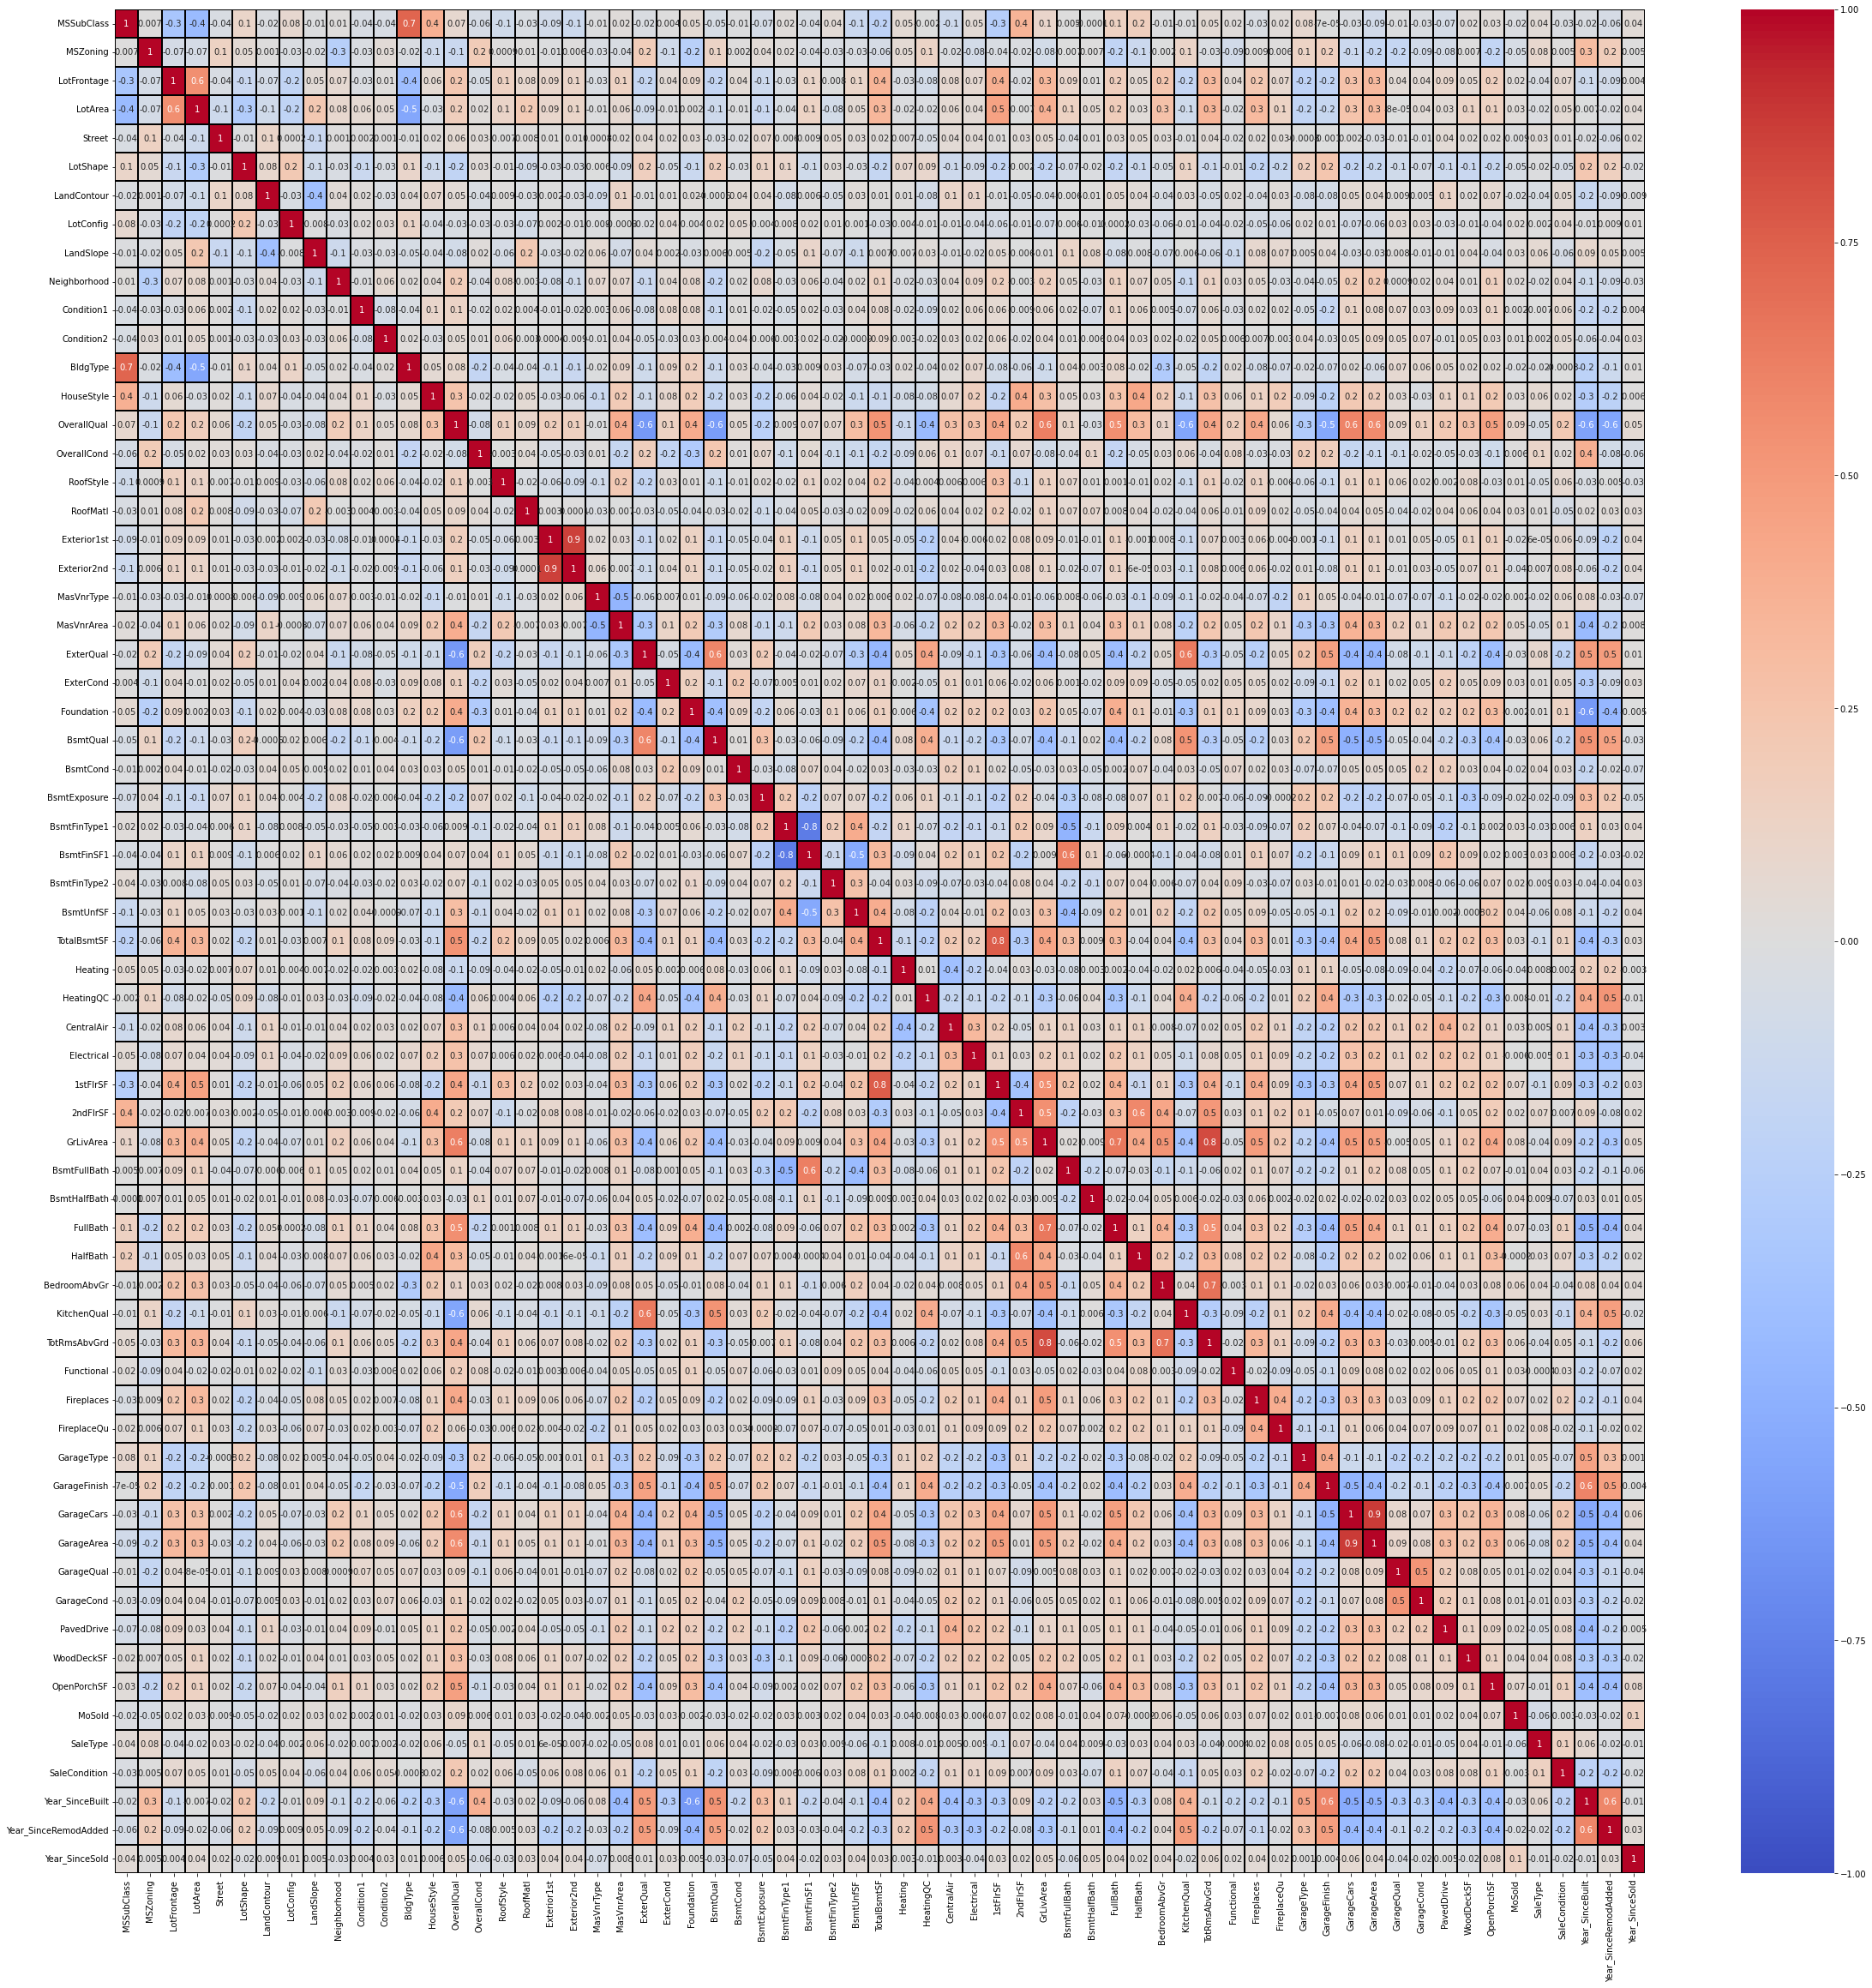

In [106]:
# Visualizing the correlation matrix by plotting heat map for train dataset.
plt.figure(figsize=(40,40))
sns.heatmap(x.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

I can clearly observe a multicolinearity issue in some of the features of train dataset so i have to check VIF and Let me plot a bar graph to get better insight on targets correlation with other features.

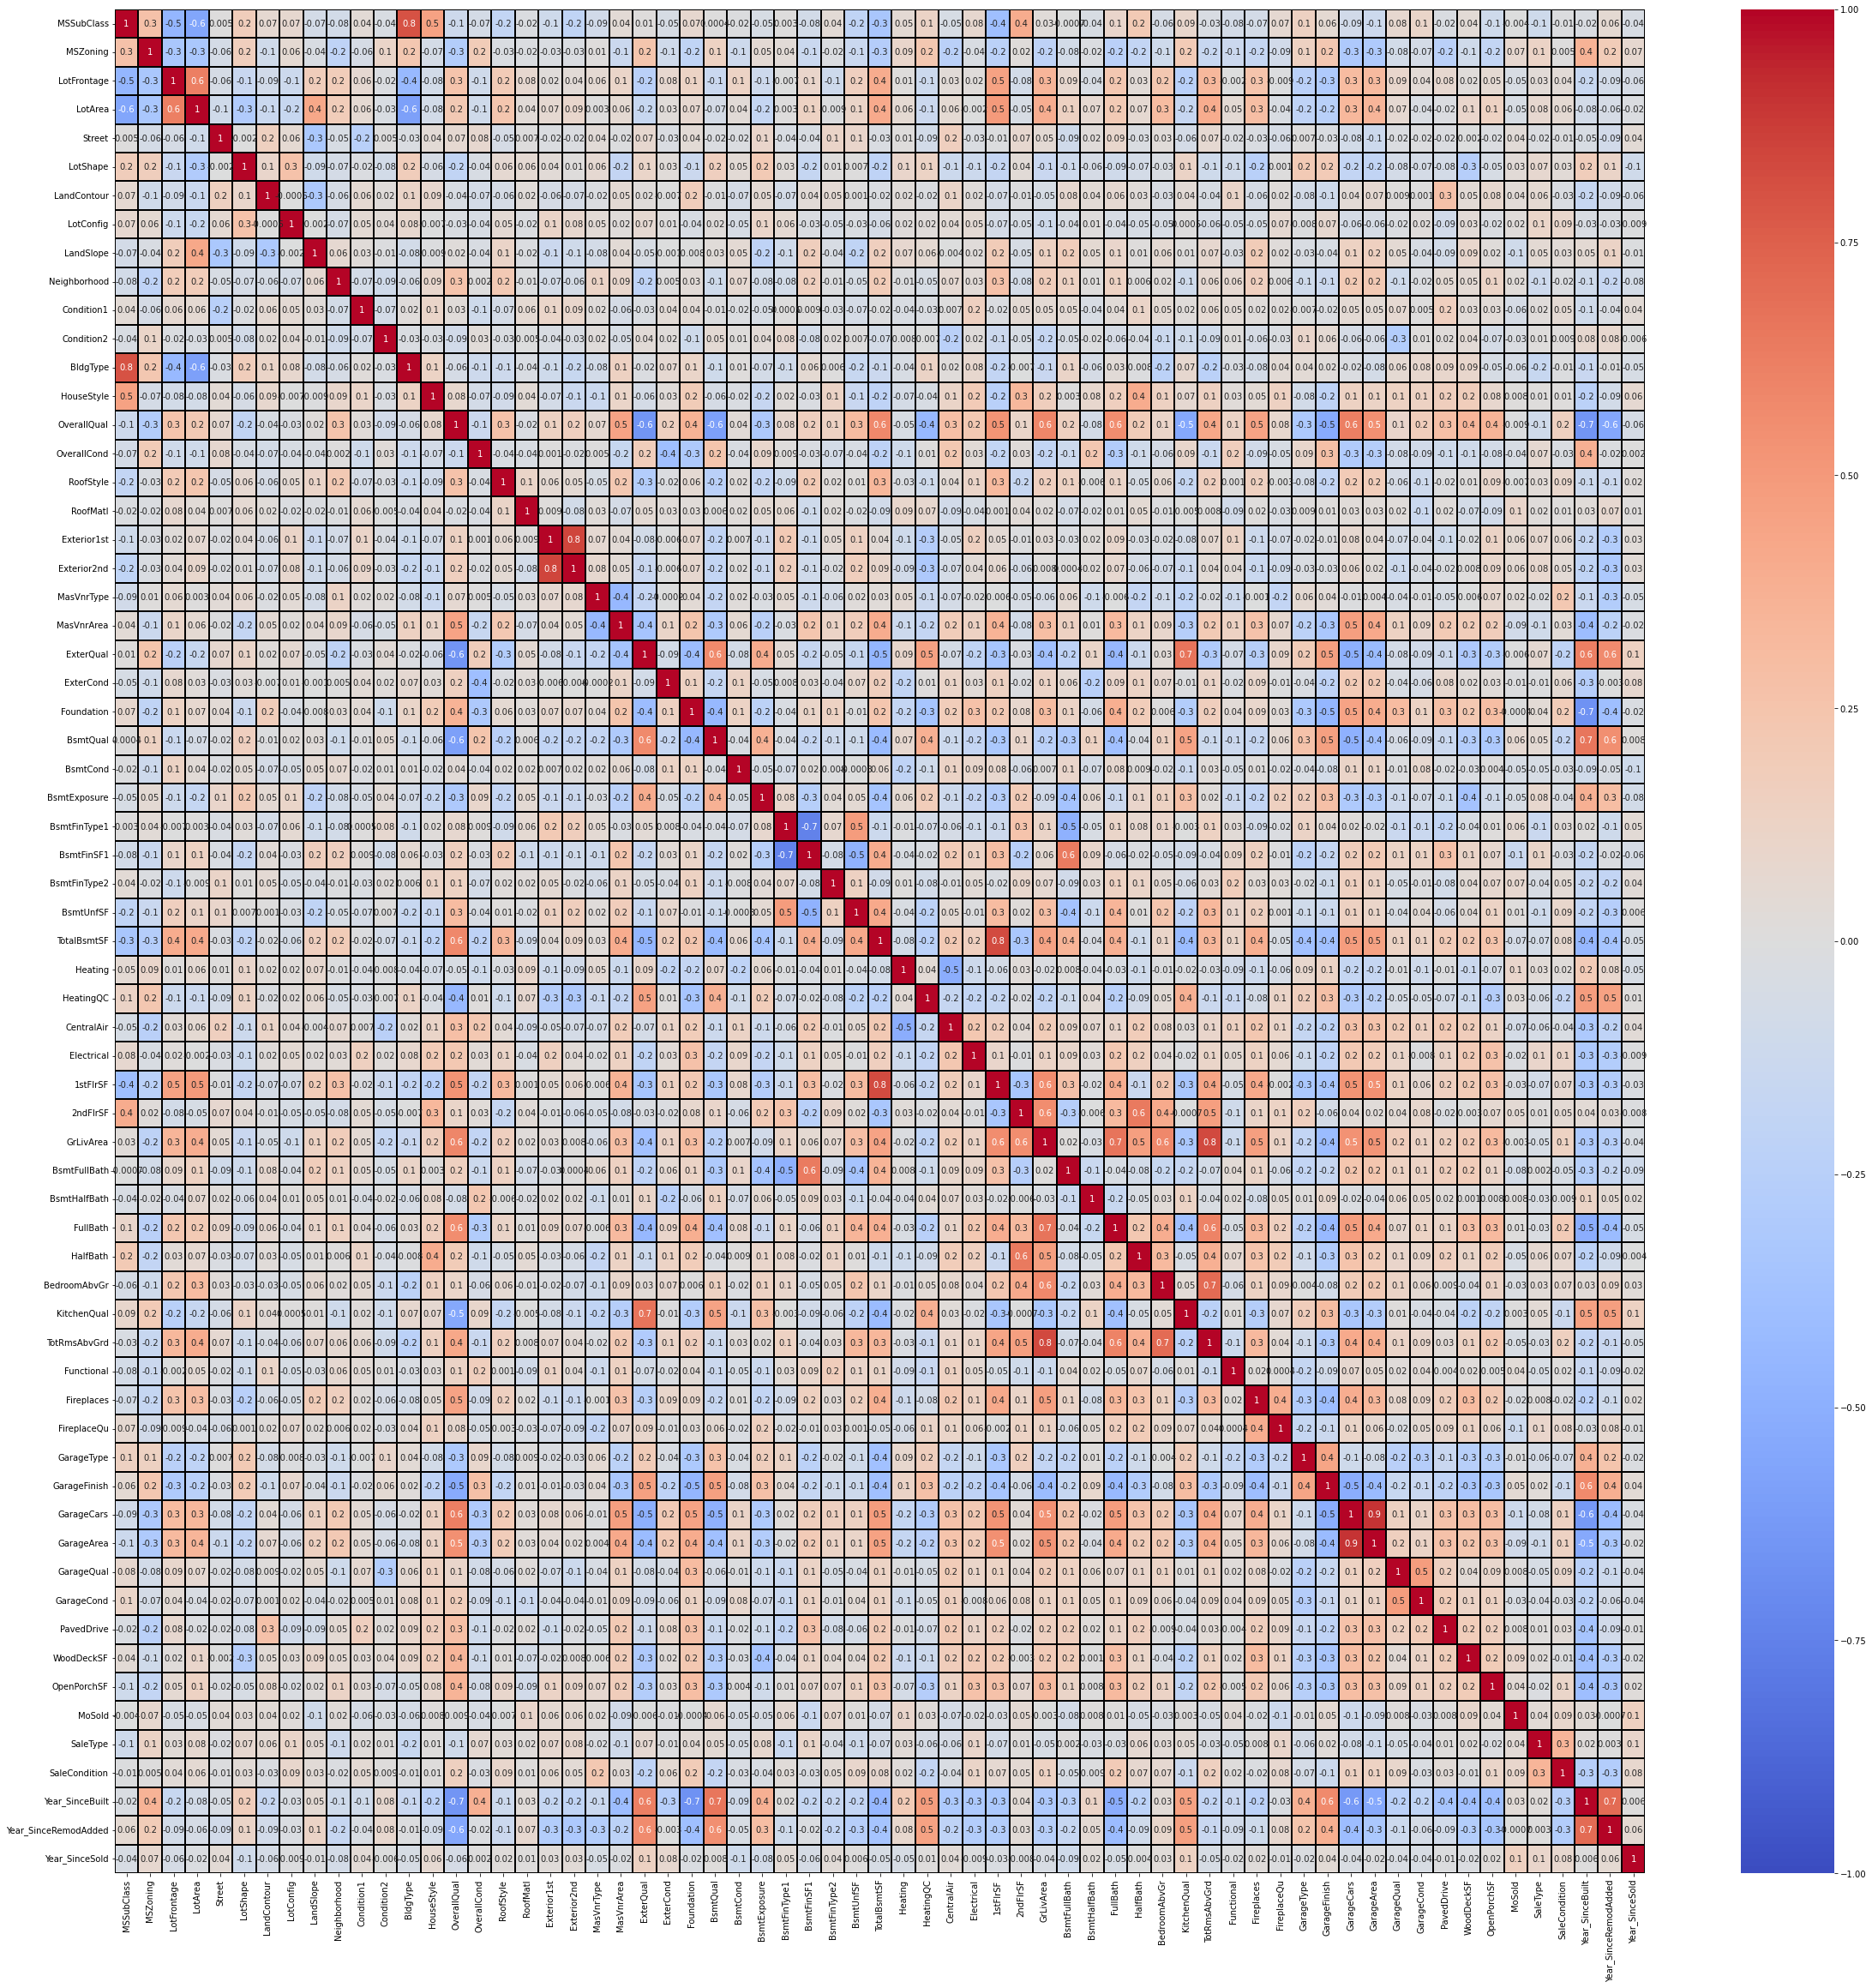

In [107]:
# Visualizing the correlation matrix by plotting heat map for test dataset.
plt.figure(figsize=(40,40))
sns.heatmap(dff.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

I can clearly observe a multicolinearity issue in some of the features of test dataset so i have to check VIF and Let me plot a bar graph to get better insight on targets correlation with other features.

Clearly i can see that MasVnrType and ForeplaceQu are less correlated with target but let me keep those columns as it is and continue.

I have separated my target and independent columns.

# Scaling the train data using standard scaler:

In [108]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

I have scaled my train data using standard scaler.

In [109]:
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  LotShape  \
0    1.508301 -0.021646     0.000000 -1.213954  0.058621 -1.373107   
1   -0.877042 -0.021646     1.070631  1.100521  0.058621 -1.373107   
2    0.077095 -0.021646     0.936867  0.158048  0.058621 -1.373107   
3   -0.877042 -0.021646     1.516514  0.496002  0.058621 -1.373107   
4   -0.877042 -0.021646     0.000000  1.196626  0.058621 -1.373107   

   LandContour  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0     0.318473   0.606420  -0.226126      0.142224   -0.037339   -0.023979   
1     0.318473   0.606420   3.295414     -0.024227   -0.037339   -0.023979   
2     0.318473  -1.220661  -0.226126      0.475125   -0.037339   -0.023979   
3     0.318473   0.606420  -0.226126      0.308675   -0.037339   -0.023979   
4     0.318473  -0.611634  -0.226126      0.308675   -0.037339   -0.023979   

   BldgType  HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  \
0  2.985495   -0.549930    -0.075169    -0.530217  -0.483544 -0.134573   
1 -0.403288   -0.549930     1.364138     0.359572  -1.685203  6.090408   
2 -0.403288    1.030838     0.644484    -0.530217  -0.483544 -0.134573   
3 -0.403288   -0.549930    -0.075169     0.359572   1.919773 -0.134573   
4 -0.403288   -0.549930    -0.075169     1.249361  -0.483544 -0.134573   

   Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  \
0    -0.212927    -0.104890    0.395209   -0.822734   0.671093   0.369322   
1     1.079014     1.050880    0.395209   -0.822734  -0.759266  -2.318331   
2    -0.535912    -0.682775    0.395209   -0.822734  -0.759266   0.369322   
3    -0.212927    -0.104890   -1.241686    1.382984   0.671093   0.369322   
4    -1.504868    -1.549602    2.032104    1.138552  -0.759266   0.369322   

   Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0   -0.557836 -0.329500  0.293234      0.635539     -1.523529   -0.112649   
1    0.852451  0.836731 -2.672114     -1.113129     -1.523529    0.394677   
2    0.852451 -0.329500  0.293234     -1.987463     -0.434828    0.925416   
3   -0.557836 -0.329500  0.293234      0.635539     -0.979178    0.797133   
4   -0.557836 -0.329500  0.293234      0.635539     -1.523529    1.176115   

   BsmtFinType2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0      0.310141   0.903777     0.038239 -0.11909   1.390230    0.267506   
1     -0.771186   1.027313     2.614679 -0.11909  -0.897602    0.267506   
2      0.310141  -0.504500     0.126458 -0.11909  -0.897602    0.267506   
3      0.310141   1.160517     1.770946 -0.11909  -0.897602    0.267506   
4      0.310141  -0.226633     1.223537 -0.11909   0.246314    0.267506   

   Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0    0.299036 -0.458345 -0.871745  -1.236502     -0.816112     -0.238775   
1    0.299036  2.122554 -0.871745   1.295050      1.101833     -0.238775   
2    0.299036  0.058641  1.176207   1.003880      1.101833     -0.238775   
3    0.299036  1.574554 -0.871745   0.739356     -0.816112     -0.238775   
4    0.299036  1.149105 -0.871745   0.314931     -0.816112      4.188040   

   FullBath  HalfBath  BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0  0.793082 -0.782707     -1.082679     0.806154     -0.965583    0.261146   
1  0.793082 -0.782707      1.365664    -0.394851      0.911999    0.261146   
2  0.793082  1.268421      0.141492     0.806154      0.911999    0.261146   
3  0.793082 -0.782707      0.141492     0.806154      0.286138    0.261146   
4  0.793082 -0.782707      0.141492    -0.394851      0.911999    0.261146   

   Fireplaces  FireplaceQu  GarageType  GarageFinish  GarageCars  GarageArea  \
0    0.777879     1.778446   -0.693653     -0.288773     0.29985   -0.171944   
1    0.777879     1.778446   -0.693653      0.946709     0.29985    0.672371   
2    0.777879     1.778446   -0.693653      0.946709     0.29985   -0.101973   
3    0.777879     1.778446   -0.693653     -0

This is the train data of independent variables after scaling.

# Scaling the test data using standard scaler:

In [110]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_1 = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)

I have scaled my test data using standard scaler.

In [ ]:
X_1.head()

This is the train data after scaling.

# Checking for multicolinearity issue in train dataset using VIF:

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()



vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif.sort_values('vif_Features')

vif_Features              Features
59      1.080702                MoSold
11      1.089421            Condition2
64      1.091081        Year_SinceSold
60      1.119759              SaleType
4       1.122771                Street
10      1.142338            Condition1
7       1.145815             LotConfig
26      1.179991              BsmtCond
17      1.184287              RoofMatl
61      1.191895         SaleCondition
23      1.210930             ExterCond
41      1.236239          BsmtHalfBath
47      1.241926            Functional
9       1.259408          Neighborhood
16      1.271631             RoofStyle
5       1.292534              LotShape
30      1.295700          BsmtFinType2
57      1.300174            WoodDeckSF
33      1.312432               Heating
6       1.321780           LandContour
36      1.360869            Electrical
1       1.374958              MSZoning
49      1.473648           FireplaceQu
8       1.480445             LandSlope
56      1.508616            PavedDrive
55      1.538444            GarageCond
20      1.554408            MasVnrType
27      1.563289          BsmtExposure
58      1.580857           OpenPorchSF
54      1.584007            GarageQual
34      1.682353             HeatingQC
35      1.695772            CentralAir
50      1.720715            GarageType
2       1.796741           LotFrontage
15      1.882985           OverallCond
48      1.898626            Fireplaces
21      1.983995            MasVnrArea
24      2.078333            Foundation
45      2.087722           KitchenQual
51      2.088548          GarageFinish
40      2.278327          BsmtFullBath
25      2.282930              BsmtQual
13      2.290909            HouseStyle
43      2.505145              HalfBath
22      2.640382             ExterQual
3       2.765082               LotArea
44      2.792966          BedroomAbvGr
63      2.813872  Year_SinceRemodAdded
28      3.014287          BsmtFinType1
42      3.119008              FullBath
14      3.970435           OverallQual
31      4.115138             BsmtUnfSF
18      4.282127           Exterior1st
19      4.316016           Exterior2nd
46      4.786857          TotRmsAbvGrd
0       5.015280            MSSubClass
12      5.031776              BldgType
53      5.609163            GarageArea
52      5.697860            GarageCars
29      5.811641            BsmtFinSF1
32      6.018915           TotalBsmtSF
62      6.890171       Year_SinceBuilt
38     13.266992              2ndFlrSF
37     14.433820              1stFlrSF
39     22.678912             GrLivArea

In [112]:
#Droping high VIF columns
dff = dff.drop(["GrLivArea"],axis=1)

In [113]:
#Droping high VIF columns
X = X.drop(["GrLivArea"],axis=1)

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif.sort_values('vif_Features')

vif_Features              Features
58      1.080329                MoSold
11      1.088214            Condition2
63      1.090660        Year_SinceSold
59      1.117372              SaleType
4       1.117637                Street
10      1.141482            Condition1
7       1.145134             LotConfig
26      1.178937              BsmtCond
17      1.179258              RoofMatl
60      1.191333         SaleCondition
23      1.210725             ExterCond
46      1.234517            Functional
40      1.235773          BsmtHalfBath
9       1.258156          Neighborhood
16      1.268608             RoofStyle
5       1.290533              LotShape
30      1.295315          BsmtFinType2
56      1.299779            WoodDeckSF
33      1.311224               Heating
6       1.321692           LandContour
36      1.360215            Electrical
1       1.374643              MSZoning
48      1.473043           FireplaceQu
8       1.477479             LandSlope
55      1.505123            PavedDrive
54      1.538306            GarageCond
20      1.551020            MasVnrType
27      1.560143          BsmtExposure
57      1.573957           OpenPorchSF
53      1.583499            GarageQual
34      1.678530             HeatingQC
35      1.695222            CentralAir
49      1.720256            GarageType
2       1.796613           LotFrontage
15      1.870651           OverallCond
47      1.885119            Fireplaces
21      1.983562            MasVnrArea
24      2.061295            Foundation
50      2.080848          GarageFinish
44      2.087582           KitchenQual
13      2.247985            HouseStyle
39      2.278320          BsmtFullBath
25      2.282425              BsmtQual
42      2.402708              HalfBath
22      2.639199             ExterQual
43      2.737963          BedroomAbvGr
3       2.764278               LotArea
62      2.806731  Year_SinceRemodAdded
41      2.937050              FullBath
28      3.014213          BsmtFinType1
14      3.882788           OverallQual
31      4.114834             BsmtUnfSF
18      4.278437           Exterior1st
19      4.312127           Exterior2nd
45      4.481832          TotRmsAbvGrd
12      5.011071              BldgType
0       5.013695            MSSubClass
38      5.431852              2ndFlrSF
52      5.584905            GarageArea
51      5.697230            GarageCars
29      5.811620            BsmtFinSF1
32      5.989427           TotalBsmtSF
37      6.226875              1stFlrSF
61      6.749969       Year_SinceBuilt

Now the multicolinearity issue is solved in train dataset.

In [115]:
#assigning updated test data
X_1 =dff

In [116]:
X_1.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0          20       2.0    86.000000  0.842656     1.0       0.0          1.0   
1         120       2.0    66.425101 -0.739104     1.0       0.0          3.0   
2          20       2.0    66.425101  0.524304     1.0       3.0          3.0   
3          70       2.0    75.000000  0.548484     1.0       3.0          0.0   
4          60       2.0    86.000000  0.897263     1.0       0.0          3.0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0        0.0        0.0          21.0         2.0         0.0       0.0   
1        1.0        0.0          21.0         2.0         0.0       4.0   
2        4.0        0.0           4.0         2.0         0.0       0.0   
3        4.0        0.0           5.0         2.0         0.0       0.0   
4        1.0        0.0          20.0         1.0         0.0       0.0   

   HouseStyle  OverallQual  OverallCond  RoofStyle  RoofMatl  Exterior1st  \
0         2.0            9            5        3.0       0.0          9.0   
1         2.0            8            5        1.0       0.0          5.0   
2         2.0            8            5        3.0       0.0          9.0   
3         5.0            7            7        1.0       0.0          6.0   
4         5.0            6            5        1.0       0.0          9.0   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0         11.0         3.0    1.182923        2.0        3.0         2.0   
1          5.0         2.0   -0.846534        2.0        3.0         1.0   
2         11.0         2.0   -0.846534        2.0        3.0         2.0   
3          7.0         2.0   -0.846534        3.0        3.0         1.0   
4         11.0         3.0    0.952580        2.0        3.0         2.0   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0       0.0       2.0           1.0           2.0    1.205140           5.0   
1       2.0       2.0           0.0           2.0    1.064798           5.0   
2       2.0       2.0           0.0           5.0   -1.375716           5.0   
3       3.0       2.0           3.0           4.0    0.235689           5.0   
4       2.0       2.0           2.0           5.0   -1.375716           5.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.455087         1922      0.0        0.0         1.0         3.0   
1  -0.841820         1220      0.0        2.0         1.0         3.0   
2   2.127575         1753      0.0        0.0         1.0         3.0   
3  -0.093395          704      0.0        0.0         1.0         3.0   
4   0.870427          894      0.0        0.0         1.0         3.0   

   1stFlrSF  2ndFlrSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0  1.814725 -0.870294             1     -0.263813         2 -0.738058   
1  0.726749 -0.870294             1     -0.263813         1 -0.738058   
2  1.586900 -0.870294             0     -0.263813         2 -0.738058   
3 -0.705442  1.137231             0     -0.263813         1  1.349285   
4 -0.584696  1.211129             0     -0.263813         2  1.349285   

   BedroomAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             3          2.0      0.961793         5.0    0.808861   
1             1          2.0     -1.618327         5.0    0.808861   
2             3          0.0      0.447622         5.0    0.808861   
3             3          1.0      0.447622         5.0    0.808861   
4             4          2.0      1.420534         5.0    0.808861   

   FireplaceQu  GarageType  GarageFinish  GarageCars  GarageArea  GarageQual  \
0          2.0         1.0           0.0           3         676         4.0   
1          0.0         1.0           1.0           2         565         4.0   
2          4.0         1.0           1.0           2         522         4.0   
3          2.0         1.0           2.0           

# MODEL BUILDING USING TRAIN DATASET:

# Finding Best Random State and Accuracy:

In [117]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [88]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.901524070730698  on Random_state  72


I got the best accuracy and random state.

In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=72)

Created train test split.

# Regression Algorithms:

In [119]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# i) RandomForestRegressor:

In [92]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(RFR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 90.01341845801399
mean_squared_error: 683569694.940551
mean_absolute_error: 17189.93743589744
root_mean_squared_error: 26145.165804418815

Cross validation score : 83.28137603308227

R2_Score - Cross Validation Score : 6.73204242493172


RandomForestRegressor is giving me 90.01% r2_score.

# ii) XGBRegressor:

In [120]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(XGB, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 89.54760265240213
mean_squared_error: 715454235.8920137
mean_absolute_error: 17993.274227653135
root_mean_squared_error: 26747.976295264165

Cross validation score : 82.8682192056057

R2_Score - Cross Validation Score : 6.679383446796436


XGBRegressor is giving me 89.547% r2_score.

# iii) ExtraTreesRegressor:

In [111]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(ETR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 85.88777187931811
mean_squared_error: 965965323.6524378
mean_absolute_error: 18404.9447008547
root_mean_squared_error: 31079.982684236453

Cross validation score : 82.74943288176182

R2_Score - Cross Validation Score : 3.138338997556289


ExtraTreesRegressor is giving me 89.46% r2_score.

# iv) GradientBoostingRegressor:

In [95]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(GBR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 89.2464753565624
mean_squared_error: 736066043.1345657
mean_absolute_error: 16937.440324617633
root_mean_squared_error: 27130.537096315762

Cross validation score : 84.47187957531798

R2_Score - Cross Validation Score : 4.774595781244415


GradientBoostingRegressor is giving me 92.16% r2_score.

# v) DecisionTreeRegressor:

In [96]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

#cross validation score
scores = cross_val_score(DTR, X, y, cv = 10).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

R2_score: 78.13917864005089
mean_squared_error: 1496347366.2478633
mean_absolute_error: 27685.239316239316
root_mean_squared_error: 38682.64942125686

Cross validation score : 68.6350858139493

R2_Score - Cross Validation Score : 9.504092826101584


DecisionTreeRegressor is giving me 78.13% r2_score.

After seeing the difference of model accuracy and cross validation score i found ExtraTreesRegressor as the best model.

# Hyper parameter tunning for best model:

In [98]:
parameter = {'n_estimators':[50,100,150,200],
             'criterion':['squared_error','absolute_error','friedman_mse','poisson'],
             'min_samples_split': [1,2,3,4],
             'max_features':[None,'sqrt','log2'],
             'max_leaf_nodes':[3,5,7,9]
            }

In [100]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

Giving ETR parameters.

In [114]:
GCV=GridSearchCV(ExtraTreesRegressor(),param_grid=parameter,cv= 5)

Running grid search CV for ETR.

In [115]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [3, 5, 7, 9],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [50, 100, 150, 200]})

Tunning the model using GCV.

In [116]:
GCV.best_params_

{'criterion': 'squared_error',
 'max_features': None,
 'max_leaf_nodes': 9,
 'min_samples_split': 3,
 'n_estimators': 50}

Got the best parameters for ETR.

In [120]:
Best_mod=ExtraTreesRegressor(criterion='squared_error',max_features=None,max_leaf_nodes=9,n_estimators=50,min_samples_split=3)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 73.56343512737583
mean_squared_error: 1809551597.7394207
mean_absolute_error: 26726.400022502534
RMSE value: 42538.82459282838


# Hypertuning reduces the model performance so will consider the ExtraTreesRegressor model with out hypertuned as the Final model

# Saving the model:

In [122]:
# Saving the model using .pkl
import joblib
joblib.dump(ETR,"House_Price.pkl")

['House_Price.pkl']

I have saved my model as House_Price.Using .pkl

# Predicting House Price for test dataset using Saved model of train dataset:

In [123]:
# Loading the saved model
model=joblib.load("House_Price.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([134092.  , 124354.5 , 101193.5 , 178261.8 , 141303.5 , 195910.27,
       123034.12, 120422.54, 129489.92, 154184.32, 139825.68, 156085.5 ,
       149927.84, 309155.2 , 124567.  , 133670.5 , 169227.35, 188455.74,
       130092.12, 237683.7 , 122997.26,  93634.09, 197596.05, 135280.5 ,
       152144.78, 224015.93, 191259.9 , 131006.5 , 255333.63, 181429.35,
       158255.5 , 173823.5 , 191009.18, 134294.25, 316129.48, 181954.2 ,
       323552.19, 136130.02, 198038.78, 152006.  , 165797.99, 163397.24,
       309231.5 , 132020.18, 207457.79, 143792.75, 296060.33, 361659.91,
       161114.5 , 102958.34, 199736.73, 387437.92, 122569.77, 148976.5 ,
       152198.  , 140068.09, 277238.3 , 135181.  , 170689.5 , 389722.61,
       124172.24, 181977.19, 147191.5 , 126386.25, 150566.98, 122777.5 ,
       121821.42, 328087.51, 182470.  , 113239.7 , 379550.32, 130579.18,
       168142.8 , 267357.  , 199681.72, 290040.29, 133319.18, 131765.1 ,
       260007.16, 129901.  , 193664.31, 209578.33, 

In [124]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

0         1         2         3         4          5    \
Predicted  134092.0  124354.5  101193.5  178261.8  141303.5  195910.27   
Actual     139900.0  107500.0   52000.0  152000.0  124000.0  193879.00   

                 6          7          8          9    ...       341  \
Predicted  123034.12  120422.54  129489.92  154184.32  ...  134195.5   
Actual     119000.00  119500.00  132000.00  159000.00  ...  122900.0   

                 342       343      344       345       346        347  \
Predicted  143397.54  140397.0  88922.0  115899.9  182138.5  270953.03   
Actual     141000.00  147000.0  92900.0   60000.0  194000.0  252000.00   

                 348       349       350  
Predicted  164056.41  153455.0  129839.0  
Actual     121500.00  143000.0  140000.0  

[2 rows x 351 columns]

Above are the predicted values and the actual values.They are almost similar.

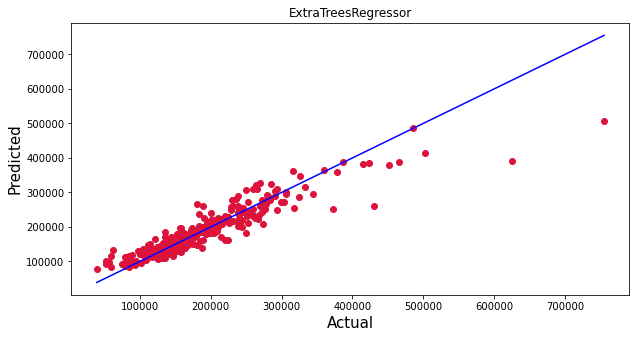

In [125]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("ExtraTreesRegressor")
plt.show()

Plotting Actual vs Predicted,To get better insight.Bule line is the actual line and red dots are the predicted values

In [137]:
#Predicting Sale price of house using cleaned test dataset X_1
Predicted_Sale_Price=model.predict(X_1)
Predicted_Sale_Price

array([328527.69, 261656.  , 261053.71, 166079.25, 226968.58,  93425.29,
       142303.64, 357155.77, 253491.93, 158561.78,  83660.83, 141478.5 ,
       117012.17, 164669.5 , 275048.03, 132550.  , 123199.84, 131745.5 ,
       174962.1 , 205800.24, 148466.09, 153141.  , 150755.3 , 112445.11,
       113271.04, 133659.25, 178084.43, 152632.5 , 172567.  , 112223.  ,
       136557.9 , 207016.28, 220432.27, 160613.74, 116745.7 , 180428.77,
       186829.82, 118534.34, 159914.  , 150091.33, 109494.52, 342708.5 ,
       214941.99, 200120.64, 132952.19, 123722.  , 126564.34, 108095.16,
       220549.2 , 333666.17, 142022.5 , 234959.22, 109763.26,  91196.8 ,
       270071.09, 112418.35, 148415.58, 192526.84, 114658.  , 251610.19,
        98540.  , 201366.3 , 136703.  , 143614.8 , 213815.88, 105411.59,
       153736.  , 219842.18, 139477.18, 160035.  , 275840.7 , 170553.  ,
       180692.29, 141197.  , 144451.  , 229149.03, 340554.92, 218221.9 ,
       296425.82, 146958.5 , 233614.09, 128466.8 , 

In [138]:
#Making dataframe for predicted SalePrice
House_Price_Predictions=pd.DataFrame()
House_Price_Predictions["SalePrice"]=Predicted_Sale_Price
House_Price_Predictions.head(10)

SalePrice
0  328527.69
1  261656.00
2  261053.71
3  166079.25
4  226968.58
5   93425.29
6  142303.64
7  357155.77
8  253491.93
9  158561.78

In [139]:
#Lets save the predictions to csv
House_Price_Predictions.to_csv("House_Price_Predictions.csv",index=False)

I have saved the predicted values as csv file.